## Урок 2. Масштабирование признаков. Регуляризация. Стохастический градиентный спуск.

In [4]:
import numpy as np
import matplotlib.pyplot as plt

In [5]:
# К признаку стажа добавим новые признаки
X = np.array([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
              [1, 1, 2, 1, 3, 0, 5, 10, 1, 2],  # стаж
              [500, 700, 750, 600, 1450,        # средняя стоимость занятия
               800, 1500, 2000, 450, 1000],
              [1, 1, 2, 1, 2, 1, 3, 3, 1, 2]])  # квалификация репетитора
               
y = [45, 55, 50, 59, 65, 35, 75, 80, 50, 60]

In [6]:
w = np.linalg.inv(X_st @ X_st.T) @ X_st @ y
w[1:] # 21.86576833,  4.56617094,  5.2704732

NameError: name 'X_st' is not defined

### Нормализация [0, 1]

In [7]:
X[1].min(), X[1].max()

(0, 10)

In [8]:
X[2].min(), X[2].max()

(450, 2000)

In [9]:
X_norm = X.copy()
X_norm = X_norm.astype(np.float64)
X_norm

array([[1.00e+00, 1.00e+00, 1.00e+00, 1.00e+00, 1.00e+00, 1.00e+00,
        1.00e+00, 1.00e+00, 1.00e+00, 1.00e+00],
       [1.00e+00, 1.00e+00, 2.00e+00, 1.00e+00, 3.00e+00, 0.00e+00,
        5.00e+00, 1.00e+01, 1.00e+00, 2.00e+00],
       [5.00e+02, 7.00e+02, 7.50e+02, 6.00e+02, 1.45e+03, 8.00e+02,
        1.50e+03, 2.00e+03, 4.50e+02, 1.00e+03],
       [1.00e+00, 1.00e+00, 2.00e+00, 1.00e+00, 2.00e+00, 1.00e+00,
        3.00e+00, 3.00e+00, 1.00e+00, 2.00e+00]])

$$x_{ij} = \frac{x_{ij} - min_{j} (x_{ij})}{max_{j} (x_{ij})-min_{j} (x_{ij})}$$

In [10]:
X_norm[1] = (X[1] - X[1].min()) / (X[1].max() - X[1].min())
X_norm[1]

array([0.1, 0.1, 0.2, 0.1, 0.3, 0. , 0.5, 1. , 0.1, 0.2])

In [11]:
X_norm[2] = (X[2] - X[2].min()) / (X[2].max() - X[2].min())
X_norm[2]

array([0.03225806, 0.16129032, 0.19354839, 0.09677419, 0.64516129,
       0.22580645, 0.67741935, 1.        , 0.        , 0.35483871])

### Стандартизация

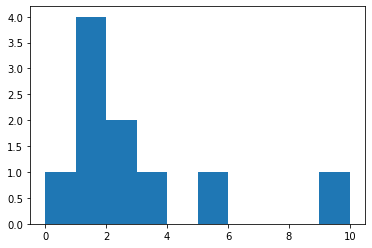

In [12]:
plt.hist(X[1]);

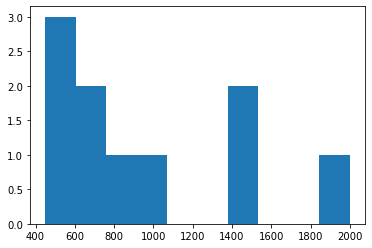

In [13]:
plt.hist(X[2]);

$$x_{ij}=\frac{x_{ij} - \mu_{j}}{\sigma_{j}}$$

In [14]:
X_st = X.copy().astype(np.float64)

X_st[1] = (X[1] - X[1].mean()) / X[1].std()
X_st[1]

array([-0.57142857, -0.57142857, -0.21428571, -0.57142857,  0.14285714,
       -0.92857143,  0.85714286,  2.64285714, -0.57142857, -0.21428571])

In [15]:
X_st[1].mean(), X_st[1].std()

(3.3306690738754695e-17, 1.0)

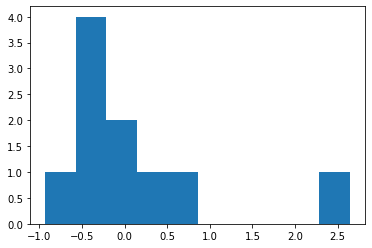

In [16]:
plt.hist(X_st[1]);

In [17]:
def calc_std_feat(x):
    res = (x - x.mean()) / x.std()
    return res

In [18]:
X_st[2] = calc_std_feat(X[2])
X_st[3] = calc_std_feat(X[3])
print(X_st[2])
print(X_st[3])

[-0.97958969 -0.56713087 -0.46401617 -0.77336028  0.97958969 -0.36090146
  1.08270439  2.11385144 -1.08270439  0.05155735]
[-0.89625816 -0.89625816  0.38411064 -0.89625816  0.38411064 -0.89625816
  1.66447944  1.66447944 -0.89625816  0.38411064]


### Стохастический градиентный спуск (SGD)

In [19]:
def calc_mse(y, y_pred):
    err = np.mean((y - y_pred)**2)
    return err

def eval_model(X, y, iterations, alpha=1e-4):
    np.random.seed(42)
    W = np.random.randn(X.shape[0])
    n = X.shape[1]
    for i in range(1, iterations + 1):
        y_pred = np.dot(W, X)
        err = calc_mse(y, y_pred)
        W -= alpha * (1/n * 2 * np.dot((y_pred - y), X.T))
        if i % (iterations / 10) == 0:
            print(i, W, err)
    return W

In [20]:
eval_model(X_st, y, iterations=1000, alpha=1e-3)

100 [10.82085913  1.29195795  1.98348488  2.85162983] 2248.0687649833903
200 [19.27186149  2.14047528  2.7330693   3.60356199] 1510.2342373891095
300 [26.18957149  2.65450377  3.14650922  4.02491826] 1022.3117228222379
400 [31.85217926  2.97593535  3.36731266  4.25691776] 697.4953996732182
500 [36.48740201  3.18621662  3.47783381  4.380594  ] 480.53723685247013
600 [40.28164149  3.33210452  3.52533114  4.4424407 ] 335.37869032086354
700 [43.38747997  3.44044741  3.53692186  4.46912965] 238.17499151935812
800 [45.92981625  3.52666784  3.52816434  4.4759573 ] 173.0530720840704
900 [48.01088834  3.59963079  3.50798339  4.47169216] 129.41143950399118
1000 [49.71438487  3.66443755  3.48149699  4.4613567 ] 100.15781666892349


array([49.71438487,  3.66443755,  3.48149699,  4.4613567 ])

In [21]:
def eval_sgd_model(X, y, iterations, qty_in_batch, alpha=1e-4):
    np.random.seed(42)
    W = np.random.randn(X.shape[0])
    n = X.shape[1] # число наблюдений
    n_batch = n // qty_in_batch
    if n % qty_in_batch != 0:
        n_batch += 1
    # print(n_batch)
    for i in range(1, iterations + 1):
        for b in range(n_batch):
            start_ = qty_in_batch * b
            end_ = qty_in_batch * (b + 1)
            X_tmp = X[:, start_ : end_]
            y_tmp = y[start_ : end_]
            y_pred_tmp = np.dot(W, X_tmp)
            err = calc_mse(y_tmp, y_pred_tmp)
            W -= alpha * (1/n * 2 * np.dot((y_pred_tmp - y_tmp), X_tmp.T))
        if i % (iterations / 10) == 0:
            print(i, W, err)
    return W

In [22]:
eval_sgd_model(X_st, y, iterations=1000, qty_in_batch=7, alpha=1e-3) # 100.15781666892349

100 [10.81768199  1.29211596  1.98434116  2.85187692] 2522.789859187071
200 [19.2667204   2.14090213  2.73471582  3.60404193] 1638.0512843953377
300 [26.18331231  2.65508951  3.14871155  4.02547865] 1079.829587461432
400 [31.84538726  2.97653289  3.36983412  4.25741062] 719.5624052459511
500 [36.48047631  3.18670618  3.48048876  4.38091792] 483.4825859720406
600 [40.27484773  3.33240763  3.52799167  4.44254283] 327.1549212062718
700 [43.38098818  3.44052217  3.5395083   4.46899484] 222.8638509460267
800 [45.92372825  3.52649917  3.53063226  4.47559543] 152.89863380046597
900 [48.00525771  3.59922111  3.51031216  4.47112755] 105.75171355762372
1000 [49.70923163  3.66379947  3.48368088  4.46062051] 73.8595179617141


array([49.70923163,  3.66379947,  3.48368088,  4.46062051])

### L1 регуляризация - Lasso

$$\sum^{n}_{i=1}L_i(\vec{x}_i,{y_i},\vec{w}) + \lambda \sum^{m}_{j=1}|w_{j}| \rightarrow \underset{w}{\text{min}}$$

### L2 регуляризация - Ridge

$$\sum^{n}_{i=1}L_i(\vec{x}_i,y_i,\vec{w}) + \lambda \sum^{m}_{j=1}w_{j}^{2} \rightarrow \underset{w}{\text{min}}$$

In [23]:
def eval_model_reg2(X, y, iterations, alpha=1e-4, lambda_=1e-8):
    np.random.seed(42)
    W = np.random.randn(X.shape[0])
    n = X.shape[1]
    for i in range(1, iterations + 1):
        y_pred = np.dot(W, X)
        err = calc_mse(y, y_pred)
        W -= alpha * (1/n * 2 * np.dot((y_pred - y), X.T) + 2 * lambda_ * W) 
        if i % (iterations / 10) == 0:
            print(i, W, err)
    return W

In [24]:
eval_model_reg2(X_st, y, iterations=1000, alpha=1e-3, lambda_=0.001)

100 [10.81977943  1.29188479  1.98326638  2.85123887] 2248.174495966113
200 [19.26820475  2.14025079  2.73257885  3.60272972] 1510.52005056178
300 [26.18241951  2.65414327  3.14578694  4.02368617] 1022.7641434294361
400 [31.84103209  2.97547956  3.36642337  4.25535143] 698.0693104166692
500 [36.47205635  3.18570474  3.47683987  4.37875637] 481.1820474779944
600 [40.26209948  3.33156577  3.52428387  4.44038363] 336.04984524294935
700 [43.36388132  3.43990014  3.53586071  4.46689313] 238.83798105676902
800 [45.90238819  3.52612135  3.5271187   4.47357128] 173.68373121426245
900 [47.97990927  3.59908764  3.50697503  4.46917888] 129.99460131981883
1000 [49.68015829  3.66389563  3.48054215  4.45873282] 100.6854252225823


array([49.68015829,  3.66389563,  3.48054215,  4.45873282])

In [25]:
# В некоторых алгоритмах используется обратный коэффициент
lambda_=1e-5
C = 1/lambda_

### Домашние задания

#### 1. Постройте график зависимости весов всех признаков от lambda в L2-регуляризации (на данных из урока).  

In [26]:
%matplotlib inline
from pylab import rcParams
rcParams["figure.figsize"] = 5, 3
%config InlineBackend.figure_format = 'svg'
import sympy
sympy.init_printing()

In [27]:
lambda_space = np.linspace(1e-10, 10, 500)
v_y = np.zeros(len(lambda_space))
v_x1 = np.zeros(len(lambda_space))
v_x2 = np.zeros(len(lambda_space))
v_x3 = np.zeros(len(lambda_space))

for n in range(0,len(lambda_space)):
    v_y[n] = lambda_space[n]
    v_x1[n] = eval_model_reg2(X_st, y, iterations=1000, alpha=1e-3, lambda_=lambda_space[n])[0]
    v_x2[n] = eval_model_reg2(X_st, y, iterations=1000, alpha=1e-3, lambda_=lambda_space[n])[1]
    v_x3[n] = eval_model_reg2(X_st, y, iterations=1000, alpha=1e-3, lambda_=lambda_space[n])[2]    

100 [10.82085913  1.29195795  1.98348488  2.85162983] 2248.0687649939637
200 [19.27186149  2.14047528  2.7330693   3.60356199] 1510.234237417692
300 [26.18957149  2.65450377  3.14650922  4.02491826] 1022.311722867484
400 [31.85217926  2.97593535  3.36731266  4.25691776] 697.4953997306117
500 [36.48740201  3.18621662  3.47783381  4.380594  ] 480.5372369169478
600 [40.28164149  3.33210452  3.52533114  4.4424407 ] 335.37869038796475
700 [43.38747997  3.44044741  3.53692186  4.46912965] 238.1749915856273
800 [45.92981625  3.52666784  3.52816434  4.4759573 ] 173.05307214708856
900 [48.01088834  3.59963079  3.50798339  4.47169216] 129.41143956223885
1000 [49.71438487  3.66443755  3.48149699  4.4613567 ] 100.15781672159464
100 [10.82085913  1.29195795  1.98348488  2.85162983] 2248.0687649939637
200 [19.27186149  2.14047528  2.7330693   3.60356199] 1510.234237417692
300 [26.18957149  2.65450377  3.14650922  4.02491826] 1022.311722867484
400 [31.85217926  2.97593535  3.36731266  4.25691776] 697

400 [30.97600953  2.93942347  3.29722935  4.13420647] 743.4087919919787
500 [35.28648617  3.14500424  3.39966768  4.23732603] 532.4819431302435
600 [38.75866652  3.28839072  3.4430745   4.2828245 ] 390.0433609636051
700 [41.55558142  3.39557679  3.45360293  4.29640134] 293.03030131925624
800 [43.80855569  3.48128482  3.44600786  4.29254047] 226.35072813653682
900 [45.62337424  3.55387024  3.42860785  4.27939352] 180.06613408194988
1000 [47.08524906  3.6180913   3.40608714  4.26153747] 147.59630555220792
100 [10.7347674   1.28610426  1.96607294  2.82050093] 2256.5092664497884
200 [18.9817364   2.12254309  2.69416229  3.53767847] 1533.00705342347
300 [25.62484482  2.62569825  3.08942157  3.92790341] 1058.3797437838207
400 [30.97600953  2.93942347  3.29722935  4.13420647] 743.4087919919787
500 [35.28648617  3.14500424  3.39966768  4.23732603] 532.4819431302435
600 [38.75866652  3.28839072  3.4430745   4.2828245 ] 390.0433609636051
700 [41.55558142  3.39557679  3.45360293  4.29640134] 293.

400 [30.13400557  2.90299638  3.229513    4.01705542] 789.067456313875
500 [34.14252573  3.1035156   3.32445861  4.1018788 ] 584.7601259822662
600 [37.32000538  3.24378623  3.36412712  4.13334613] 446.07610984133396
700 [39.83873462  3.34898536  3.37368998  4.13614292] 350.6800940175407
800 [41.83528462  3.43319198  3.36710638  4.1239262 ] 284.16609632748924
900 [43.41791281  3.50431311  3.35210631  4.10422836] 237.15110528613437
1000 [44.67243285  3.56682145  3.33295951  4.08118187] 203.46526677446712
100 [10.64959398  1.28027254  1.94886805  2.78979455] 2264.879317597544
200 [18.69759369  2.10473912  2.65606709  3.47344758] 1555.499706518151
300 [25.07709393  2.5970889   3.03393894  3.83433677] 1094.0305695795257
400 [30.13400557  2.90299638  3.229513    4.01705542] 789.067456313875
500 [34.14252573  3.1035156   3.32445861  4.1018788 ] 584.7601259822662
600 [37.32000538  3.24378623  3.36412712  4.13334613] 446.07610984133396
700 [39.83873462  3.34898536  3.37368998  4.13614292] 350.6

100 [10.56532788  1.27446295  1.93186745  2.75950459] 2273.179356362172
200 [18.41929345  2.08706542  2.61876401  3.41082346] 1577.7116095336164
300 [24.54573517  2.56868934  2.98000719  3.74407882] 1129.2426517726237
400 [29.32463162  2.86670287  3.16406489  3.90517076] 834.377093708698
500 [33.05238294  3.06187257  3.25206487  3.97374321] 637.1218505643635
600 [35.96019442  3.1985344   3.28831695  3.99322177] 502.96830231836157
700 [38.22841643  3.30109201  3.29700223  3.98723745] 410.2483003436911
800 [39.99773026  3.38303876  3.29129839  3.96860634] 345.15449936209
900 [41.37787358  3.4518917   3.27836919  3.94423896] 298.76897884179283
1000 [42.45444662  3.51189022  3.26209256  3.9178241 ] 265.25288521382714
100 [10.54440185  1.27301403  1.92764891  2.75199646] 2275.243478292404
200 [18.35061522  2.08266758  2.60955975  3.39541323] 1583.2206799142568
300 [24.41539042  2.56162371  2.96676042  3.72201554] 1137.974882494917
400 [29.12721374  2.85765563  3.14804615  3.87798963] 845.64

200 [18.07942669  2.06515939  2.57321991  3.33473509] 1605.0813025330253
300 [23.9037338   2.53350371  2.91469414  3.63570635] 1172.6127717437791
400 [28.35658069  2.82159054  3.08530153  3.77229988] 890.4004838917803
500 [31.76090758  3.00976605  3.16532832  3.82313755] 702.370377169336
600 [34.3636114   3.14138281  3.19772053  3.83013184] 574.6500178154436
700 [36.35345181  3.23994266  3.20542051  3.81554402] 486.32068820766153
800 [37.87474085  3.3182857   3.20065663  3.79112339] 424.21650025349584
900 [39.03780919  3.38351654  3.18992108  3.76300297] 379.899659348061
1000 [39.9270077   3.4396462   3.17663693  3.73432151] 347.86323557446315
100 [10.4612547   1.26723233  1.91089989  2.72221859] 2283.456622995362
200 [18.07942669  2.06515939  2.57321991  3.33473509] 1605.0813025330253
300 [23.9037338   2.53350371  2.91469414  3.63570635] 1172.6127717437791
400 [28.35658069  2.82159054  3.08530153  3.77229988] 890.4004838917803
500 [31.76090758  3.00976605  3.16532832  3.82313755] 702.

1000 [38.08061282  3.38000605  3.11072266  3.60188122] 416.4461052832006
100 [10.37899069  1.26147313  1.89434916  2.69284376] 2291.6007537013493
200 [17.81377852  2.04778552  2.53762973  3.2755653 ] 1626.6609844610678
300 [23.40723361  2.50561987  2.86406411  3.55241335] 1206.7739923145864
400 [27.61538865  2.78575207  3.02461956  3.67127444] 934.644809311364
500 [30.78133324  2.9681548   3.0987902   3.70977201] 754.1908994866823
600 [33.16318586  3.09541725  3.12839253  3.70851827] 632.0252190567941
700 [34.95513823  3.19037247  3.13538488  3.68864382] 547.7656610695024
800 [36.30328768  3.26539688  3.13126285  3.66103732] 488.688287772272
900 [37.31754842  3.32731802  3.12201271  3.63121424] 446.67746341174063
1000 [38.08061282  3.38000605  3.11072266  3.60188122] 416.4461052832006
100 [10.37899069  1.26147313  1.89434916  2.69284376] 2291.6007537013493
200 [17.81377852  2.04778552  2.53762973  3.2755653 ] 1626.6609844610678
300 [23.40723361  2.50561987  2.86406411  3.55241335] 1206

900 [35.71932848  3.27035839  3.05652654  3.50976733] 514.1476191046843
1000 [36.37414877  3.31945729  3.04693234  3.48053888] 486.025359934143
100 [10.2975993   1.25573657  1.87799408  2.66386617] 2299.676319329242
200 [17.55354186  2.03054753  2.50277115  3.21786218] 1647.9600943343514
300 [22.92537324  2.47798216  2.81482241  3.47201549] 1240.445810605682
400 [26.90233036  2.75017489  2.96591568  3.57466987] 978.3160701544591
500 [29.84661264  2.92670013  3.03465793  3.60229639] 805.5157246803242
600 [32.02636913  3.04940805  3.06171059  3.59413507] 689.118855067008
700 [33.64012011  3.14050843  3.06805995  3.5701617 ] 609.230528170777
800 [34.83483713  3.21196169  3.06449548  3.54040358] 553.518045818734
900 [35.71932848  3.27035839  3.05652654  3.50976733] 514.1476191046843
1000 [36.37414877  3.31945729  3.04693234  3.48053888] 486.025359934143
100 [10.27738657  1.25430599  1.87393558  2.65668316] 2301.6845503239547
200 [17.48931344  2.02625943  2.49416874  3.20366079] 1653.241099

800 [33.46117362  3.15830283  3.000227    3.42830348] 618.1799577243426
900 [34.23249816  3.2130687   2.99336296  3.39754466] 581.6210146670659
1000 [34.79442727  3.25854127  2.98521082  3.36897635] 555.7516297545344
100 [10.19707135  1.24859793  1.85782145  2.62819407] 2309.6750451935304
200 [17.23566484  2.00919322  2.46019996  3.1477342 ] 1674.190393607283
300 [22.34287865  2.44379475  2.75515249  3.37541332] 1281.8315414270448
400 [26.04868052  2.70611778  2.89519504  3.4597821 ] 1032.0267380487044
500 [28.73761582  2.87521315  2.95770599  3.47566637] 868.7915821383627
600 [30.68871124  2.99204403  2.98187806  3.46050224] 759.7422802739782
700 [32.10442895  3.07810173  2.9875057   3.43279869] 685.534140817611
800 [33.13167581  3.14488594  2.98453605  3.40151384] 634.2685642309009
900 [33.87704765  3.19873781  2.97792359  3.37081252] 598.4244812825257
1000 [34.41789055  3.24330813  2.97009688  3.34247662] 573.1267351832988
100 [10.19707135  1.24859793  1.85782145  2.62819407] 2309.6

800 [31.86604589  3.09132284  2.92322234  3.29893983] 698.149971767477
900 [32.51604988  3.14152695  2.91752794  3.26875407] 665.1683198495637
1000 [32.98016809  3.18253711  2.9108786   3.24155331] 642.1493527674788
100 [10.11760554  1.24291283  1.84189723  2.60008945] 2317.5979950532587
200 [16.9871494   1.99226584  2.42692381  3.09318482] 1694.8608347647619
300 [21.89216609  2.41674231  2.70886839  3.30111315] 1314.3668294266522
400 [25.39446395  2.67123679  2.84065265  3.37230366] 1074.2447324826726
500 [27.89518741  2.83436627  2.898587    3.38011271] 918.588363082699
600 [29.68076306  2.94641445  2.92067701  3.36047298] 815.422339344284
700 [30.95570629  3.02834255  2.92578646  3.33071015] 745.804112304151
800 [31.86604589  3.09132284  2.92322234  3.29893983] 698.149971767477
900 [32.51604988  3.14152695  2.91752794  3.26875407] 665.1683198495637
1000 [32.98016809  3.18253711  2.9108786   3.24155331] 642.1493527674788
100 [10.11760554  1.24291283  1.84189723  2.60008945] 2317.5979

700 [29.87253835  2.97890096  2.86635764  3.2349252 ] 805.1438732130927
800 [30.67927679  3.03808285  2.86414528  3.20318014] 761.0597100597299
900 [31.24611439  3.08469501  2.85924235  3.17387642] 730.8911455885293
1000 [31.64439076  3.12226152  2.85359395  3.14805543] 710.0904318260533
100 [10.03897904  1.23725081  1.82616041  2.57236378] 2325.453857166379
200 [16.7436484   1.97547837  2.39432371  3.03997473] 1715.2535423648285
300 [21.45454165  2.38996194  2.66382877  3.22934906] 1346.3856601510536
400 [24.76455055  2.63670593  2.78783955  3.28854498] 1115.7611122991404
500 [27.09025786  2.79388396  2.8415317   3.28932339] 967.5668657090149
600 [28.72436661  2.90112659  2.86171894  3.26606969] 870.216639870102
700 [29.87253835  2.97890096  2.86635764  3.2349252 ] 805.1438732130927
800 [30.67927679  3.03808285  2.86414528  3.20318014] 761.0597100597299
900 [31.24611439  3.08469501  2.85924235  3.17387642] 730.8911455885293
1000 [31.64439076  3.12226152  2.85359395  3.14805543] 710.09

400 [24.15787918  2.60254614  2.73668649  3.20831533] 1156.5506091958416
500 [26.32083935  2.75381398  2.78644646  3.20300138] 1015.6641512327727
600 [27.81634     2.85626607  2.80489477  3.17688183] 924.0111605054626
700 [28.85034987  2.92990771  2.80910586  3.14491941] 863.3814235843518
800 [29.56527863  2.98534421  2.80719846  3.11360095] 822.7675504852971
900 [30.05959029  3.0284652   2.80297777  3.08544404] 795.3093911850012
1000 [30.40136422  3.06274265  2.79818023  3.06115573] 776.6210690583003
100 [9.94186101 1.23020592 1.80674917 2.53823127] 2335.180042624375
200 [16.44614758  1.95469224  2.3544997   2.97528951] 1740.3558838419322
300 [20.92524615  2.35687847  2.60921714  3.14305734] 1385.6760730762253
400 [24.0097234   2.59406638  2.7241498   3.18878799] 1166.6319732942295
500 [26.1338115   2.74386589  2.77297246  3.18208605] 1027.5446971024055
600 [27.59653917  2.84512652  2.79100997  3.15535488] 937.2926760346165
700 [28.60382895  2.91774271  2.79512042  3.12326427] 877.752

400 [23.43068906  2.56039597  2.6749792   3.11271747] 1206.485549540009
500 [25.40616196  2.70436882  2.72022558  3.10096134] 1074.4720053981578
600 [26.74482973  2.80090147  2.73670929  3.07215954] 989.7152438999021
700 [27.6519702   2.86946154  2.74044055  3.03981957] 934.431657954258
800 [28.26668868  2.92034586  2.73885776  3.0094613 ] 897.9549067877148
900 [28.6832491   2.9592932   2.73535889  2.98298738] 873.6883506345633
1000 [28.96552885  2.98971384  2.73144771  2.96072386] 857.4508949321511
100 [9.86508668 1.22459627 1.79142504 2.5113384 ] 2342.8866395983546
200 [16.21351007  1.93822291  2.32336227  2.92495984] 1760.1287699414922
300 [20.51548241  2.33073182  2.56683039  3.07663779] 1416.5183078999096
400 [23.43068906  2.56039597  2.6749792   3.11271747] 1206.485549540009
500 [25.40616196  2.70436882  2.72022558  3.10096134] 1074.4720053981578
600 [26.74482973  2.80090147  2.73670929  3.07215954] 989.7152438999021
700 [27.6519702   2.86946154  2.74044055  3.03981957] 934.43165

200 [15.98552106  1.92189621  2.2928499   2.87585364] 1779.6288316600626
300 [20.11743174  2.30487475  2.52556064  3.0124424 ] 1446.8343301858783
400 [22.87268998  2.52713459  2.62732412  3.03978462] 1245.5743111688512
500 [24.70996299  2.66536907  2.66925562  3.02370778] 1120.4223381486227
600 [25.93510119  2.7572523   2.68431935  2.9933736 ] 1040.9680501505113
700 [26.75205305  2.82184898  2.68770622  2.96114685] 989.7600843221146
800 [27.29681636  2.86922775  2.68634418  2.93180811] 956.4012336181297
900 [27.66007775  2.90501478  2.68333349  2.90680285] 934.5065011808477
1000 [27.90230925  2.93257047  2.68001242  2.88618296] 920.0615108290315
100 [9.7891197  1.21901008 1.77628043 2.48480704] 2350.52764818669
200 [15.98552106  1.92189621  2.2928499   2.87585364] 1779.6288316600626
300 [20.11743174  2.30487475  2.52556064  3.0124424 ] 1446.8343301858783
400 [22.87268998  2.52713459  2.62732412  3.03978462] 1245.5743111688512
500 [24.70996299  2.66536907  2.66925562  3.02370778] 1120.4

400 [22.33482008  2.49429548  2.58112499  2.96983091] 1283.888466404564
500 [24.04357736  2.62689573  2.61998397  2.95008929] 1165.3697350438727
600 [25.16482177  2.71422846  2.63375     2.91868493] 1091.0059338480805
700 [25.90055472  2.77497574  2.63682409  2.88686472] 1043.6743460361547
800 [26.38332454  2.8189907   2.63565311  2.85870362] 1013.2467910770267
900 [26.7001062   2.85179076  2.63306299  2.83522224] 993.5521315219773
1000 [26.90797052  2.87668385  2.63024338  2.81622587] 980.7453311563719
100 [9.69528174 1.21206048 1.75759851 2.45214332] 2359.9873832372173
200 [15.70690939  1.90168928  2.25556584  2.81614049] 1803.6230801702045
300 [19.63574577  2.27296659  2.47548916  2.93519294] 1483.9890169942432
400 [22.20339571  2.48615305  2.56979598  2.95279025] 1293.345177678112
500 [23.88145647  2.61736262  2.60792259  2.93222652] 1176.4476364049422
600 [24.97813553  2.70357517  2.62138204  2.90061879] 1103.321708093058
700 [25.69485866  2.76337991  2.62438253  2.86893892] 1056.

100 [9.62109648 1.20652742 1.74284922 2.42640649] 2367.4825186629287
200 [15.48899326  1.88568547  2.22640617  2.76966615] 1822.5162564277925
300 [19.26264187  2.24777459  2.43660218  2.8756876 ] 1513.121564923444
400 [21.68947797  2.45385741  2.52533709  2.88635085] 1330.6827942182895
500 [23.250178    2.57958123  2.56066937  2.8628441 ] 1220.117317069799
600 [24.2538653   2.66138947  2.57296929  2.83065063] 1151.7994778075201
700 [24.89933732  2.71750958  2.57569251  2.7996619 ] 1109.01723322806
800 [25.31444084  2.75753815  2.57472446  2.77312163] 1081.9815130548127
900 [25.5813942   2.78685861  2.57257906  2.75156591] 1064.7924529413522
1000 [25.7530721   2.80870761  2.57028161  2.73453017] 1053.8196634231997
100 [9.62109648 1.20652742 1.74284922 2.42640649] 2367.4825186629287
200 [15.48899326  1.88568547  2.22640617  2.76966615] 1822.5162564277925
300 [19.26264187  2.24777459  2.43660218  2.8756876 ] 1513.121564923444
400 [21.68947797  2.45385741  2.52533709  2.88635085] 1330.6827

100 [9.54768791 1.20101814 1.7282719  2.40101456] 2374.913579968866
200 [15.27538829  1.86982583  2.19782471  2.72430994] 1841.1431019160646
300 [18.90003162  2.22288285  2.39871917  2.81813529] 1541.7306291513191
400 [21.1938037   2.42200685  2.48220971  2.82256513] 1367.2363834688674
500 [22.64536456  2.54237554  2.51495202  2.79662226] 1262.7540666889406
600 [23.56395144  2.61991034  2.52619226  2.76416558] 1199.0106253405345
700 [24.145258    2.67249024  2.52866369  2.73404061] 1159.6254668779738
800 [24.51312447  2.70951369  2.52783336  2.70886869] 1135.0845136654739
900 [24.7459203   2.7362562   2.52598853  2.6888358 ] 1119.7080507006995
1000 [24.89323978  2.75589186  2.52403858  2.67329134] 1110.0388440663378
100 [9.54768791 1.20101814 1.7282719  2.40101456] 2374.913579968866
200 [15.27538829  1.86982583  2.19782471  2.72430994] 1841.1431019160646
300 [18.90003162  2.22288285  2.39871917  2.81813529] 1541.7306291513191
400 [21.1938037   2.42200685  2.48220971  2.82256513] 1367.2

400 [20.71559807  2.39060876  2.44036251  2.76130118] 1403.0064160849054
500 [22.06566441  2.50576124  2.47070427  2.73337283] 1304.3547060203214
600 [22.906372    2.57916266  2.4809761   2.70092528] 1244.9494192654295
700 [23.42989386  2.62835424  2.4832189   2.6717958 ] 1208.7459454914404
800 [23.75589917  2.66254009  2.4825075   2.64802244] 1186.5090957343787
900 [23.95890782  2.68688577  2.48092149  2.62947406] 1172.7816190978062
1000 [24.0853245   2.70449738  2.47926671  2.61533953] 1164.2797001926058
100 [9.45700541 1.19416508 1.71028866 2.36975213] 2384.1130152903324
200 [15.01429493  1.85020444  2.16289029  2.66914073] 1864.0555730780404
300 [18.46099837  2.19219361  2.35272835  2.74882571] 1576.7600841107333
400 [20.59868881  2.38283065  2.43009493  2.74636445] 1411.8267780396416
500 [21.9245123   2.49670159  2.45986451  2.71800408] 1314.5930850954624
600 [22.74680532  2.56909239  2.46990756  2.68559608] 1256.2354363607321
700 [23.25680218  2.61746121  2.47209658  2.65673188] 

300 [18.12074982  2.16798451  2.31698845  2.69539432] 1604.2025146828273
400 [20.14128433  2.35200629  2.3897792   2.68807815] 1446.6215941309795
500 [21.37441935  2.46084363  2.41736569  2.65822464] 1354.9016067931168
600 [22.12700335  2.52928534  2.42654344  2.62610493] 1300.5879777689238
700 [22.58630641  2.57446181  2.42852983  2.59835307] 1268.0642140502446
800 [22.86661971  2.60533689  2.42794444  2.57633376] 1248.449272781826
900 [23.0376953   2.62693445  2.42663193  2.55956484] 1236.5661409980391
1000 [23.14210297  2.6422679   2.42528437  2.54706835] 1229.3466185151133
100 [9.38531096 1.18870957 1.69609009 2.34511824] 2391.401621637023
200 [14.8100339   1.83467006  2.13556053  2.62619029] 1882.091565157051
300 [18.12074982  2.16798451  2.31698845  2.69539432] 1604.2025146828273
400 [20.14128433  2.35200629  2.3897792   2.68807815] 1446.6215941309795
500 [21.37441935  2.46084363  2.41736569  2.65822464] 1354.9016067931168
600 [22.12700335  2.52928534  2.42654344  2.62610493] 130

900 [22.34671236  2.58039147  2.38476091  2.50675801] 1285.5893995147644
1000 [22.43630514  2.59409103  2.38361772  2.49546895] 1279.2670126459454
100 [9.31436375 1.18327809 1.68205627 2.32081343] 2398.6276767019513
200 [14.60977293  1.81928042  2.10876597  2.58426214] 1899.8689048795725
300 [17.78991273  2.14408088  2.28215217  2.64368011] 1631.1330095717285
400 [19.69973477  2.32164577  2.35063629  2.63204252] 1480.6420794011315
500 [20.84667184  2.4256009   2.3761994   2.60103892] 1394.1838736151283
600 [21.53546096  2.49024576  2.38458637  2.56938841] 1343.6828502760382
700 [21.9491109   2.53238868  2.3863888   2.54281072] 1313.8723114371028
800 [22.19752695  2.56080179  2.3858887   2.52217657] 1296.1585520971487
900 [22.34671236  2.58039147  2.38476091  2.50675801] 1285.5893995147644
1000 [22.43630514  2.59409103  2.38361772  2.49546895] 1279.2670126459454
100 [9.31436375 1.18327809 1.68205627 2.32081343] 2398.6276767019513
200 [14.60977293  1.81928042  2.10876597  2.58426214] 189

600 [20.97055715  2.45198223  2.34397394  2.51526356] 1385.5358514169993
700 [21.34309325  2.49125022  2.34560937  2.48989881] 1358.2420334542712
800 [21.56324203  2.51736319  2.34518275  2.47061829] 1342.2653094026114
900 [21.69333809  2.53510614  2.34421392  2.4564781 ] 1332.8778790818355
1000 [21.77021785  2.54732742  2.34324425  2.44630472] 1327.3493583752565
100 [9.24415496 1.1778707  1.66818506 2.29683297] 2405.791649888325
200 [14.41342126  1.80403552  2.08249407  2.54332859] 1917.390140834695
300 [17.46817918  2.12048341  2.24819094  2.59361684] 1657.5564467118027
400 [19.27337655  2.29175209  2.31262184  2.57814762] 1513.895300274635
500 [20.34015095  2.39097962  2.33630963  2.54629648] 1432.4502141779008
600 [20.97055715  2.45198223  2.34397394  2.51526356] 1385.5358514169993
700 [21.34309325  2.49125022  2.34560937  2.48989881] 1358.2420334542712
800 [21.56324203  2.51736319  2.34518275  2.47061829] 1342.2653094026114
900 [21.69333809  2.53510614  2.34421392  2.4564781 ] 133

600 [20.43077629  2.41449956  2.30464707  2.46356157] 1426.16699029047
700 [20.76628636  2.45104949  2.3061309   2.43942938] 1401.202330484473
800 [20.96138467  2.47501907  2.30576753  2.42146036] 1386.8087299843492
900 [21.07483389  2.49106796  2.30493546  2.40852299] 1378.4813089528552
1000 [21.14080434  2.50195521  2.30411311  2.39937539] 1373.6534019257656
100 [9.15741915 1.17114543 1.65107147 2.26730645] 2414.6600290259607
200 [14.17334444  1.78518283  2.05037064  2.49351935] 1938.9355391004144
300 [17.07836273  2.09141753  2.20692809  2.53326296] 1689.8809297151201
400 [18.76083024  2.25504429  2.26662628  2.51363146] 1554.3959918236455
500 [19.73524644  2.34858274  2.28816173  2.48109118] 1478.8747695492464
600 [20.29958836  2.40525115  2.2950096   2.45099611] 1436.1365345142262
700 [20.62643206  2.44114576  2.29645777  2.42717322] 1411.7259751570116
800 [20.81572654  2.46460329  2.29610877  2.40952452] 1397.7053327545195
900 [20.92535814  2.48025148  2.2953078   2.39687583] 138

700 [20.08358894  2.40211478  2.25852522  2.37951737] 1452.971260149418
800 [20.25134414  2.4236163   2.2582286   2.36311682] 1440.3560768072161
900 [20.34694735  2.43774867  2.25754092  2.3515746 ] 1433.198251306167
1000 [20.40143135  2.4471541   2.2568718   2.34358766] 1429.1294056500194
100 [9.08884018 1.16579246 1.6375584  2.2440389 ] 2421.6860346522203
200 [13.98546824  1.77026323  2.0252306   2.45472636] 1955.8902225160098
300 [16.77604258  2.06850948  2.17483653  2.4866863 ] 1715.1838164424887
400 [18.36638293  2.22620641  2.23099868  2.46418141] 1585.9559856846786
500 [19.27271334  2.31537103  2.2509536   2.43134648] 1514.9069133846062
600 [19.78922845  2.36874639  2.25721138  2.40210491] 1475.2735299068083
700 [20.08358894  2.40211478  2.25852522  2.37951737] 1452.971260149418
800 [20.25134414  2.4236163   2.2582286   2.36311682] 1440.3560768072161
900 [20.34694735  2.43774867  2.25754092  2.3515746 ] 1433.198251306167
1000 [20.40143135  2.4471541   2.2568718   2.34358766] 142

500 [18.82818452  2.28278645  2.21485847  2.38362123] 1549.9738133410988
600 [19.3009292   2.33302197  2.22057698  2.35530247] 1513.2448707937026
700 [19.56603588  2.3640131   2.2217689   2.33393857] 1492.885484123487
800 [19.71470291  2.38370093  2.22151727  2.31872967] 1481.5453414435815
900 [19.7980727   2.39644979  2.22092702  2.30821723] 1475.210943755999
1000 [19.84482497  2.40480507  2.22035976  2.3010666 ] 1471.666716537479
100 [9.02097174 1.16046377 1.62420114 2.22108085] 2428.651484078463
200 [13.80122142  1.75548787  2.00057469  2.41684327] 1972.5975457751451
300 [16.48189909  2.0459073   2.14353402  2.44156382] 1739.9986481313506
400 [17.98517471  2.197838    2.19636838  2.4165541 ] 1616.780775458023
500 [18.82818452  2.28278645  2.21485847  2.38362123] 1549.9738133410988
600 [19.3009292   2.33302197  2.22057698  2.35530247] 1513.2448707937026
700 [19.56603588  2.3640131   2.2217689   2.33393857] 1492.885484123487
800 [19.71470291  2.38370093  2.22151727  2.31872967] 1481.5

500 [18.40078283  2.25082711  2.17983117  2.33780267] 1584.094762801095
600 [18.83346913  2.29807354  2.18505687  2.31045826] 1550.078997307823
700 [19.07223023  2.32683159  2.18613814  2.29029658] 1531.507229523055
800 [19.20398125  2.34484089  2.1859251   2.27621964] 1521.321849275973
900 [19.27668292  2.35632943  2.18541862  2.26666187] 1515.7212461180784
1000 [19.31680051  2.36374353  2.1849378   2.26027067] 1512.63694399304
100 [8.93712265 1.15383712 1.60772058 2.19281175] 2437.273853093265
200 [13.5758924   1.73722107  1.97041856  2.37073166] 1993.1381270881097
300 [16.12531697  2.01808355  2.10547825  2.38712165] 1770.340957141701
400 [17.52645692  2.16303598  2.15442716  2.35945126] 1654.2961679143755
500 [18.29651037  2.24293461  2.17123611  2.32663343] 1592.4795697383995
600 [18.71972455  2.28945697  2.17634539  2.29953883] 1559.1133097611944
700 [18.95231912  2.31767866  2.17740063  2.27967341] 1540.9653690598532
800 [19.08015092  2.3352886   2.17719635  2.2658699 ] 1531.051

300 [15.8486202   1.99616641  2.07586284  2.34507242] 1794.0822477920356
400 [17.17308865  2.13571889  2.12190893  2.31561445] 1683.5115340050604
500 [17.88935733  2.21175207  2.13748342  2.28305068] 1625.4469365083726
600 [18.27671335  2.2554693   2.14215237  2.25697375] 1594.5679740215471
700 [18.48619435  2.28163065  2.14310959  2.23827311] 1578.0276910048995
800 [18.59948107  2.29772064  2.14293714  2.22552461] 1569.131437748753
900 [18.6607462   2.30779341  2.14251902  2.21705835] 1564.3352739102202
1000 [18.6938782   2.31416938  2.14212806  2.21151601] 1561.7460204261524
100 [8.87082253 1.14856322 1.59470651 2.17053395] 2444.10476499619
200 [13.39951597  1.7227691   1.94681137  2.33480729] 2009.2992101313146
300 [15.8486202   1.99616641  2.07586284  2.34507242] 1794.0822477920356
400 [17.17308865  2.13571889  2.12190893  2.31561445] 1683.5115340050604
500 [17.88935733  2.21175207  2.13748342  2.28305068] 1625.4469365083726
600 [18.27671335  2.2554693   2.14215237  2.25697375] 159

900 [18.19455556  2.27021949  2.10933583  2.17910932] 1601.6779927546434
1000 [18.22298551  2.27586447  2.10900458  2.174172  ] 1599.4288993359219
100 [8.80520616 1.14331374 1.58184175 2.14855148] 2450.87664296594
200 [13.22651058  1.70846021  1.92365288  2.29971571] 2025.2221957824463
300 [15.57927601  1.97455172  2.04695996  2.30430591] 1817.357908098554
400 [16.83128326  2.10886527  2.09027432  2.27333455] 1712.0329472511671
500 [17.49752993  2.18118573  2.10470477  2.24114675] 1657.5155572410217
600 [17.85206832  2.22224078  2.10897132  2.21610785] 1628.9538260307386
700 [18.04073338  2.24647356  2.10983958  2.19853563] 1613.8882485171205
800 [18.14113014  2.26116212  2.10969437  2.18678012] 1605.9110710309637
900 [18.19455556  2.27021949  2.10933583  2.17910932] 1601.6779927546434
1000 [18.22298551  2.27586447  2.10900458  2.174172  ] 1599.4288993359219
100 [8.80520616 1.14331374 1.58184175 2.14855148] 2450.87664296594
200 [13.22651058  1.70846021  1.92365288  2.29971571] 2025.222

900 [17.75028164  2.233727    2.07711877  2.14259063] 1637.705929046566
1000 [17.77467675  2.23872026  2.07683815  2.138198  ] 1635.753690355803
100 [8.74026553 1.1380887  1.56912437 2.12686012] 2457.589954041069
200 [13.05680083  1.69429392  1.90093278  2.2654346 ] 2040.91000606725
300 [15.31704961  1.95323789  2.0187478   2.26477392] 1840.1752948439457
400 [16.50057395  2.08247195  2.05949147  2.23253883] 1739.8742073173769
500 [17.1202977   2.1512298   2.0728617   2.20083076] 1688.707530895627
600 [17.44480098  2.18976142  2.07676052  2.17683964] 1662.3023537598697
700 [17.61471923  2.21219149  2.07754806  2.16035527] 1648.5879695437538
800 [17.70369279  2.22558977  2.07742613  2.14953125] 1641.439489676953
900 [17.75028164  2.233727    2.07711877  2.14259063] 1637.705929046566
1000 [17.77467675  2.23872026  2.07683815  2.138198  ] 1635.753690355803
100 [8.72413503 1.13678627 1.56596782 2.12148227] 2459.259185385518
200 [13.01487967  1.69077457  1.89532007  2.25698841] 2044.79555732

100 [8.66002795 1.13159184 1.55343196 2.10014894] 2465.899943330026
200 [12.84918621  1.67678577  1.87313383  2.22369002] 2060.1935444722612
300 [14.99893169  1.92701594  1.9844219   2.21702476] 1868.0640330960748
400 [16.10211409  2.05012194  2.02216436  2.18352672] 1773.7408704918882
500 [16.66823292  2.11463305  2.03431787  2.15253973] 1726.4990158042851
600 [16.95874746  2.1501986   2.03780125  2.12985846] 1702.5776205116963
700 [17.10783047  2.17054303  2.03849831  2.11467241] 1690.3922801564452
800 [17.18433522  2.18247382  2.03840074  2.10492815] 1684.164813440681
900 [17.22359508  2.18958301  2.03814733  2.0988141 ] 1680.9763781296606
1000 [17.24374201  2.19386126  2.03791933  2.09502507] 1679.3422129605492
100 [8.66002795 1.13159184 1.55343196 2.10014894] 2465.899943330026
200 [12.84918621  1.67678577  1.87313383  2.22369002] 2060.1935444722612
300 [14.99893169  1.92701594  1.9844219   2.21702476] 1868.0640330960748
400 [16.10211409  2.05012194  2.02216436  2.18352672] 1773.74

900 [16.82358413  2.15540534  2.00796546  2.06518951] 1714.2466294964906
1000 [16.84087162  2.15918263  2.0077724   2.06182732] 1712.8301220920325
100 [8.59657893 1.12642192 1.54103919 2.07909744] 2472.4831819929395
200 [12.68662534  1.66293832  1.8513637   2.19115422] 2075.3630134203536
300 [14.75190422  1.9063722   1.95768797  2.18010435] 1889.8779432563176
400 [15.79477182  2.02475012  1.99318839  2.14582405] 1800.1038193650452
500 [16.32137034  2.086025    2.00444852  2.1154937 ] 1755.8011470435526
600 [16.58727755  2.1193625   2.00763164  2.09385141] 1733.7081796541381
700 [16.72154804  2.13816521  2.00826383  2.07965251] 1722.6285425451183
800 [16.78934825  2.14902978  2.00818253  2.07070652] 1717.0550589491654
900 [16.82358413  2.15540534  2.00796546  2.06518951] 1714.2466294964906
1000 [16.84087162  2.15918263  2.0077724   2.06182732] 1712.8301220920325
100 [8.59657893 1.12642192 1.54103919 2.07909744] 2472.4831819929395
200 [12.68662534  1.66293832  1.8513637   2.19115422] 207

1000 [16.45608126  2.12553589  1.97846715  2.02974493] 1745.1492930061697
100 [8.53378027 1.12127653 1.52878768 2.05832374] 2479.009365305476
200 [12.52712744  1.64923158  1.83000019  2.1593607 ] 2090.3069490908665
300 [14.51128701  1.88602283  1.93157895  2.14427508] 1911.2583884051346
400 [15.497149    1.99982501  1.96496964  2.10939464] 1825.833316223965
500 [15.98699058  2.05800303  1.97540188  2.0797782 ] 1784.3004074843059
600 [16.23037634  2.08923586  1.97831061  2.05916043] 1763.9042788148836
700 [16.35130653  2.10660302  1.97888395  2.04590174] 1753.834607889908
800 [16.41139266  2.11648992  1.97881647  2.03769813] 1748.848897053686
900 [16.44124743  2.12220341  1.97863059  2.03272524] 1746.3764719674841
1000 [16.45608126  2.12553589  1.97846715  2.02974493] 1745.1492930061697
100 [8.51818133 1.11999402 1.52574665 2.05317325] 2480.6320504918776
200 [12.48772356  1.6458268   1.82472175  2.15152598] 2094.0080442562617
300 [14.45211051  1.88098121  1.92514712  2.13548349] 1916.53

900 [16.07548919  2.08994479  1.95010968  2.00135333] 1777.41568921863
1000 [16.08821757  2.09288273  1.94997134  1.99871411] 1776.3530618052996
100 [8.45618495 1.11487932 1.51366912 2.03274124] 2487.0875652261457
200 [12.33195902  1.63229499  1.80385352  2.12063264] 2108.6742760502807
300 [14.21922326  1.86099644  1.89979291  2.1009616 ] 1937.38628261661
400 [15.13820519  1.96928915  1.93072071  2.06556062] 1857.126719225209
500 [15.58569302  2.0237863   1.9402029   2.03690033] 1818.8301396805643
600 [15.80359214  2.0525542   1.94280165  2.01753544] 1800.3826523117245
700 [15.90969565  2.06826719  1.94330903  2.00538553] 1791.4522817237205
800 [15.96136155  2.07704682  1.94325594  1.99803499] 1787.1176838506035
900 [15.98651968  2.08202376  1.94310291  1.99367363] 1785.010729569199
1000 [15.99877014  2.08487029  1.94297022  1.99111377] 1783.9857446366154
100 [8.45618495 1.11487932 1.51366912 2.03274124] 2487.0875652261457
200 [12.33195902  1.63229499  1.80385352  2.12063264] 2108.6742

800 [15.61813167  2.04644585  1.91568623  1.96750295] 1816.606613895567
900 [15.64007028  2.05089929  1.91555529  1.96358038] 1814.7536579331615
1000 [15.65058191  2.0534067   1.91544302  1.96131608] 1813.8666179674515
100 [8.39482195 1.10978918 1.50172875 2.01257818] 2493.487064029403
200 [12.17910688  1.61890232  1.7833714   2.09043798] 2123.121722159576
300 [13.99230223  1.84130051  1.87502227  2.06744239] 1957.8200361216022
400 [14.86107334  1.94535037  1.90411031  2.03178925] 1881.4845480929878
500 [15.27733474  1.99705018  1.91289496  2.00393309] 1845.6059991075065
600 [15.47678147  2.02397272  1.91526967  1.98554358] 1828.5891540515483
700 [15.57234401  2.03846754  1.91572977  1.97422777] 1820.4802627009544
800 [15.61813167  2.04644585  1.91568623  1.96750295] 1816.606613895567
900 [15.64007028  2.05089929  1.91555529  1.96358038] 1814.7536579331615
1000 [15.65058191  2.0534067   1.91544302  1.96131608] 1813.8666179674515
100 [8.39482195 1.10978918 1.50172875 2.01257818] 2493.48

900 [15.30802852  2.02064685  1.8887528   1.93444684] 1843.5107067734975
1000 [15.31704809  2.02285414  1.88865781  1.93244569] 1842.7433680609986
100 [8.33408495 1.10472362 1.48992377 1.99268025] 2499.831006687848
200 [12.02910283  1.60564803  1.76326666  2.06092349] 2137.3533871303052
300 [13.77116117  1.82189076  1.85081785  2.03488912] 1977.8458149478622
400 [14.59247444  1.92184097  1.8781748   1.999114  ] 1905.2565466570825
500 [14.97969196  1.97087002  1.88631307  1.97208764] 1871.652352704045
600 [15.16225007  1.99605429  1.88848305  1.95464626] 1855.9602896483545
700 [15.24831918  2.00941837  1.88890026  1.94411825] 1848.599989243826
800 [15.28889744  2.01666431  1.88886478  1.93797165] 1845.1396210626385
900 [15.30802852  2.02064685  1.8887528   1.93444684] 1843.5107067734975
1000 [15.31704809  2.02285414  1.88865781  1.93244569] 1842.7433680609986
100 [8.31899766 1.10346107 1.48699347 1.98774675] 2501.408365447917
200 [11.99203945  1.60235599  1.75829843  2.05364903] 2140.87

800 [14.97286192  1.98767649  1.86276284  1.90938649] 1872.75659829123
900 [14.98954473  1.99123585  1.86266711  1.90622174] 1871.3251790688755
1000 [14.997284    1.99317777  1.86258677  1.9044546 ] 1870.6616466656174
100 [8.2590329  1.09842622 1.47535527 1.96817492] 2507.6835072631716
200 [11.84550745  1.58927356  1.73865346  2.02495955] 2154.8441011027408
300 [13.50258957  1.79802675  1.82133308  1.99550233] 2002.3163080994964
400 [14.26822198  1.89304907  1.84666929  1.95973754] 1934.1698709809484
500 [14.6219721   1.9389114   1.85406587  1.93377329] 1903.2179245228822
600 [14.78541756  1.96206586  1.85600456  1.91747532] 1889.0438005952815
700 [14.86093533  1.97413127  1.85637371  1.9078685 ] 1882.5259180419168
800 [14.8958273   1.98055058  1.85634655  1.90238205] 1879.5222349332562
900 [14.91194866  1.98401107  1.8562545   1.8993018 ] 1878.1364059834655
1000 [14.91939731  1.98589161  1.85617746  1.89758895] 1877.496588800762
100 [8.2590329  1.09842622 1.47535527 1.96817492] 2507.6

700 [14.56433138  1.94669637  1.83112736  1.8799143 ] 1908.7289446181044
800 [14.59525367  1.9525194   1.83110565  1.87490918] 1906.0478287568926
900 [14.6093119   1.95561003  1.83102701  1.87214629] 1904.8305549998408
1000 [14.61570321  1.9572633   1.83096187  1.87063517] 1904.2775409775404
100 [8.19967786 1.09341596 1.46384855 1.94885978] 2513.9041219795827
200 [11.70168445  1.57632767  1.71936698  1.99691052] 2168.60123260723
300 [13.29380544  1.77925055  1.79834223  1.96499574] 2021.452879906184
400 [14.01763311  1.87048403  1.82216908  1.92935459] 1956.676750493222
500 [14.34670765  1.91394527  1.82902111  1.90425215] 1927.702797146
600 [14.49631516  1.93558439  1.83079264  1.88883344] 1914.6407674819143
700 [14.56433138  1.94669637  1.83112736  1.8799143 ] 1908.7289446181044
800 [14.59525367  1.9525194   1.83110565  1.87490918] 1906.0478287568926
900 [14.6093119   1.95561003  1.83102701  1.87214629] 1904.8305549998408
1000 [14.61570321  1.9572633   1.83096187  1.87063517] 1904.27

600 [14.21761774  1.90971691  1.80623814  1.86111058] 1939.494280798074
700 [14.27887781  1.91994617  1.80654161  1.85283694] 1934.1337384422895
800 [14.30628209  1.92522567  1.80652449  1.84827446] 1931.74129574075
900 [14.3185412   1.92798453  1.80645732  1.84579805] 1930.6724223640535
1000 [14.32402523  1.9294372   1.80640225  1.84446585] 1930.1945935188044
100 [8.14092542 1.08843027 1.45247162 1.92979769] 2520.070664335475
200 [11.56051105  1.56351748  1.70043096  1.96948509] 2182.1523239480675
300 [13.0902393   1.76075111  1.77586516  1.93534569] 2040.2069575220496
400 [13.77455278  1.84832864  1.79827191  1.89991867] 1978.6445860721808
500 [14.08067573  1.88950188  1.80461936  1.87568279] 1951.5282756107304
600 [14.21761774  1.90971691  1.80623814  1.86111058] 1939.494280798074
700 [14.27887781  1.91994617  1.80654161  1.85283694] 1934.1337384422895
800 [14.30628209  1.92522567  1.80652449  1.84827446] 1931.74129574075
900 [14.3185412   1.92798453  1.80645732  1.84579805] 1930.67

600 [13.94881889  1.88444824  1.78231665  1.83426027] 1963.6309184370173
700 [14.00399412  1.89386081  1.78259179  1.82659157] 1958.7715892856045
800 [14.02828065  1.89864524  1.78257848  1.82243563] 1956.6373621578427
900 [14.03897087  1.90110671  1.78252115  1.82021755] 1955.6990814371122
1000 [14.0436764   1.90238245  1.78247461  1.81904388] 1955.2863438196775
100 [8.06832162 1.08223271 1.43843042 1.90632043] 2527.7034930059835
200 [11.38768208  1.54769419  1.67724183  1.93605533] 2198.8059822082246
300 [12.84287558  1.73801131  1.74846858  1.89944078] 2063.123485051017
400 [13.4808262   1.82120075  1.76921774  1.8643933 ] 2005.367724763766
500 [13.76050104  1.85966665  1.77498623  1.84124005] 1980.414273987789
600 [13.8831093   1.87822287  1.77643244  1.82767887] 1969.5561008222157
700 [13.93686024  1.88744105  1.77670092  1.82015527] 1964.8147688402564
800 [13.96042442  1.89210881  1.77668846  1.81609562] 1962.740707822394
900 [13.97075486  1.8945009   1.77663335  1.81393802] 1961

600 [13.62601603  1.85368147  1.75326963  1.80185852] 1992.8327391370572
700 [13.67442822  1.86215929  1.75351303  1.79489159] 1988.5361048787665
800 [13.69531157  1.86638695  1.7535036   1.79119687] 1986.6865249062037
900 [13.70431993  1.86851991  1.75345659  1.78926592] 1985.8895974255865
1000 [13.70820583  1.86960372  1.75341889  1.78826506] 1985.5460393753979
100 [8.01089956 1.07730229 1.42733943 1.88781459] 2533.750026187206
200 [11.25226036  1.535186    1.65906594  1.90997382] 2211.904357942002
300 [12.65047178  1.72012321  1.72709354  1.87160712] 2081.0452234003596
400 [13.25361203  1.79994358  1.74660468  1.83694149] 2026.173737668362
500 [13.51378596  1.83636074  1.75194814  1.81464895] 2002.830902033244
600 [13.62601603  1.85368147  1.75326963  1.80185852] 1992.8327391370572
700 [13.67442822  1.86215929  1.75351303  1.79489159] 1988.5361048787665
800 [13.69531157  1.86638695  1.7535036   1.79119687] 1986.6865249062037
900 [13.70431993  1.86851991  1.75345659  1.78926592] 1985

700 [13.42139018  1.83749886  1.73090965  1.77037012] 2011.5565098040686
800 [13.43989771  1.84132626  1.73090272  1.76700972] 2009.9075320147772
900 [13.44775318  1.84322729  1.73086264  1.76528269] 2009.2084000198406
1000 [13.45108741  1.84417807  1.7308308   1.76440217] 2008.911828295369
100 [7.95405766 1.07239642 1.41637287 1.86955028] 2539.7439526984626
200 [11.11930479  1.52281052  1.6412157   1.88446435] 2224.806327871507
300 [12.46278446  1.70250162  1.70618543  1.84453428] 2098.609447582548
400 [13.03302038  1.77907497  1.72453184  1.81031093] 2046.4855552432753
500 [13.27505531  1.81354309  1.72948147  1.78887054] 2024.6534705910992
600 [13.37778632  1.82970504  1.730689    1.77681701] 2015.449221003574
700 [13.42139018  1.83749886  1.73090965  1.77037012] 2011.5565098040686
800 [13.43989771  1.84132626  1.73090272  1.76700972] 2009.9075320147772
900 [13.44775318  1.84322729  1.73086264  1.76528269] 2009.2084000198406
1000 [13.45108741  1.84417807  1.7308308   1.76440217] 200

700 [13.17727564  1.81344104  1.70886964  1.74655535] 2033.9034134691556
800 [13.19367766  1.81690464  1.70886476  1.7435009 ] 2032.433630509196
900 [13.20052777  1.81859822  1.7088306   1.74195718] 2031.8204435046332
1000 [13.20338863  1.81943192  1.70880372  1.74118298] 2031.5644962585175
100 [7.88381088 1.06629858 1.40283723 1.8470543 ] 2547.1630634588764
200 [10.95649682  1.50752631  1.61934987  1.85335924] 2240.6620580158287
300 [12.23459012  1.68084439  1.68068652  1.81172214] 2120.0734364056825
400 [12.76621702  1.75352549  1.69767352  1.77812501] 2071.2006022576734
500 [12.98734888  1.78569143  1.70217131  1.75773333] 2051.1252099460244
600 [13.07932937  1.80050643  1.70325009  1.74655372] 2042.8277026224118
700 [13.11758895  1.80751858  1.70344527  1.74070815] 2039.388010451275
800 [13.13350313  1.81089656  1.70344085  1.73772601] 2037.9599473604424
900 [13.14012269  1.81254181  1.70340803  1.73622512] 2037.3665638340112
1000 [13.14287612  1.81334851  1.70338226  1.73547549] 2

800 [12.8981147   1.78724371  1.68207835  1.71502177] 2059.657358053083
900 [12.90388707  1.78870866  1.68205041  1.71368111] 2059.1370687351164
1000 [12.90624958  1.78941564  1.68202866  1.71302245] 2058.9242385787484
100 [7.82824985 1.06144788 1.39214483 1.82932094] 2553.040256175659
200 [10.82889605  1.49544584  1.6022062   1.82908293] 2253.132802156276
300 [12.05699859  1.66381036  1.66078065  1.78626414] 2136.8606502822313
400 [12.55963561  1.73350679  1.67675243  1.75321823] 2090.4487127745274
500 [12.76535456  1.76393351  1.68091852  1.73364939] 2071.679878110751
600 [12.84955108  1.7777473   1.68190425  1.72313172] 2064.04468154802
700 [12.88401098  1.78418833  1.68208118  1.71773041] 2060.929879782426
800 [12.8981147   1.78724371  1.68207835  1.71502177] 2059.657358053083
900 [12.90388707  1.78870866  1.68205041  1.71368111] 2059.1370687351164
1000 [12.90624958  1.78941564  1.68202866  1.71302245] 2058.9242385787484
100 [7.82824985 1.06144788 1.39214483 1.82932094] 2553.040256

700 [12.6584005   1.76142011  1.66123633  1.69538784] 2081.8558511266724
800 [12.67089973  1.76418266  1.66123479  1.69292898] 2080.722165048589
900 [12.67593332  1.76548655  1.66121101  1.69173209] 2080.2660636522055
1000 [12.67796041  1.76610587  1.66119265  1.69115366] 2080.0824808253865
100 [7.77324742 1.05662166 1.38157175 1.81181812] 2558.8662875169694
200 [10.70359186  1.48349487  1.58536533  1.80533167] 2265.4165940827925
300 [11.8836756   1.64703203  1.64129974  1.76148315] 2153.314491425831
400 [12.35890902  1.71385493  1.65631647  1.72902631] 2109.244890851136
500 [12.55029104  1.74262944  1.66017525  1.71026378] 2091.7003584109652
600 [12.6273628   1.75550576  1.66107595  1.70037566] 2084.675890735654
700 [12.6584005   1.76142011  1.66123633  1.69538784] 2081.8558511266724
800 [12.67089973  1.76418266  1.66123479  1.69292898] 2080.722165048589
900 [12.67593332  1.76548655  1.66121101  1.69173209] 2080.2660636522055
1000 [12.67796041  1.76610587  1.66119265  1.69115366] 2080

700 [12.44037375  1.73919664  1.64089252  1.67365198] 2102.1897726496672
800 [12.45145104  1.74169351  1.64089201  1.67142104] 2101.179972712059
900 [12.4558404   1.7428536   1.64087179  1.67035305] 2100.780221032387
1000 [12.45757968  1.74339593  1.6408563   1.66984533] 2100.6218989379386
100 [7.70527006 1.05062328 1.36852085 1.79025883] 2566.077551557133
200 [10.55011578  1.46873668  1.56472994  1.77636024] 2280.5127921753674
300 [11.67282986  1.62641349  1.61752796  1.73142302] 2173.4239802528427
400 [12.11590727  1.68979577  1.63143011  1.69974711] 2132.1234858942216
500 [12.29076711  1.71662169  1.63493631  1.68196674] 2116.0010426491876
600 [12.35977528  1.72841026  1.63574096  1.67282122] 2109.6732872789858
700 [12.38700925  1.7337239   1.6358828   1.66830965] 2107.183441469874
800 [12.39775709  1.73615832  1.63588252  1.66613249] 2106.202465786732
900 [12.40199872  1.73728494  1.6358631   1.66509456] 2105.81568987306
1000 [12.40367266  1.73780953  1.63584826  1.66460316] 2105.6

600 [12.15342764  1.70728222  1.61601238  1.65145586] 2129.0625817036025
700 [12.17795721  1.71215777  1.61614095  1.64729485] 2126.8092734019738
800 [12.18748237  1.7143571   1.61614144  1.64532075] 2125.935696661055
900 [12.19118111  1.71535902  1.61612493  1.64439516] 2125.5967856198
1000 [12.19261738  1.71581817  1.61611242  1.64396408] 2125.465244883894
100 [7.65150097 1.04585206 1.35821066 1.77326286] 2571.790076300759
200 [10.42979945  1.45707329  1.54854627  1.75374115] 2292.3863738346363
300 [11.50864955  1.61019799  1.59895993  1.70808028] 2189.153977909001
400 [11.92758134  1.6709448   1.61202976  1.67705852] 2149.9478145292696
500 [12.0902581   1.6963008   1.61527715  1.66004171] 2134.881995949055
600 [12.15342764  1.70728222  1.61601238  1.65145586] 2129.0625817036025
700 [12.17795721  1.71215777  1.61614095  1.64729485] 2126.8092734019738
800 [12.18748237  1.7143571   1.61614144  1.64532075] 2125.935696661055
900 [12.19118111  1.71535902  1.61612493  1.64439516] 2125.5967

600 [11.9536129   1.68662702  1.59674558  1.63066478] 2147.931914277169
700 [11.9757067   1.69109921  1.5968621   1.62682907] 2145.893008811471
800 [11.98414827  1.6930855   1.59686319  1.62503995] 2145.1152068667643
900 [11.98737361  1.6939762   1.59684918  1.62421491] 2144.8182898988402
1000 [11.98860595  1.69437793  1.59683863  1.62383693] 2144.7048968572585
100 [7.59826976 1.04110524 1.34801488 1.75648697] 2577.4528625987687
200 [10.31162287  1.44553599  1.53264433  1.73160426] 2304.0822195059945
300 [11.34833729  1.59422707  1.58077925  1.68534107] 2204.5736825650943
400 [11.74444378  1.65243892  1.59306617  1.65499457] 2167.3595523352938
500 [11.89578763  1.67640026  1.59607377  1.63872052] 2153.28300386086
600 [11.9536129   1.68662702  1.59674558  1.63066478] 2147.931914277169
700 [11.9757067   1.69109921  1.5968621   1.62682907] 2145.893008811471
800 [11.98414827  1.6930855   1.59686319  1.62503995] 2145.1152068667643
900 [11.98737361  1.6939762   1.59684918  1.62421491] 2144.8

800 [11.78742399  1.67232579  1.57803211  1.60526846] 2163.762873977775
900 [11.79023652  1.67311735  1.57802022  1.60453339] 2163.502791267719
1000 [11.79129387  1.67346872  1.57801133  1.6042021 ] 2163.405058956157
100 [7.53247771 1.03520596 1.33542884 1.73582185] 2584.462060300929
200 [10.16684142  1.43129006  1.51315376  1.70459237] 2318.456319653553
300 [11.15321227  1.57460208  1.55858177  1.65773426] 2223.4224108381914
400 [11.52253389  1.62978175  1.56995506  1.62825517] 2188.5615013568563
500 [11.66081702  1.65210046  1.5726876   1.61287916] 2175.633018151677
600 [11.71259365  1.66145294  1.57328775  1.60544607] 2170.815677522199
700 [11.73198009  1.66546586  1.57339079  1.60198384] 2169.016712891688
800 [11.73923886  1.66721383  1.57339244  1.60040276] 2168.344154769712
900 [11.74195672  1.66798234  1.57338103  1.59968865] 2168.0925495322977
1000 [11.74297435  1.66832212  1.57337251  1.59936812] 2167.998384435177
100 [7.53247771 1.03520596 1.33542884 1.73582185] 2584.46206030

800 [11.55034196  1.64707006  1.55509928  1.58123947] 2186.3562112239733
900 [11.55271196  1.64775275  1.55508961  1.58060355] 2186.135862516888
1000 [11.55358509  1.64804981  1.55508244  1.58032277] 2186.054718920274
100 [7.4804342  1.0305139  1.32548518 1.71952981] 2590.0145149312457
200 [10.05331328  1.42003254  1.49786349  1.68349558] 2329.762385876499
300 [11.00119017  1.55916882  1.54123381  1.6362784 ] 2238.1688777444506
400 [11.35039841  1.61202813  1.55192492  1.60750736] 2205.0864927170687
500 [11.47905056  1.6331093   1.55445557  1.59282478] 2193.010313187151
600 [11.52644742  1.64181402  1.55500393  1.5858591 ] 2188.5820596082713
700 [11.54390894  1.64549253  1.55509732  1.58267096] 2186.954820811032
800 [11.55034196  1.64707006  1.55509928  1.58123947] 2186.3562112239733
900 [11.55271196  1.64775275  1.55508961  1.58060355] 2186.135862516888
1000 [11.55358509  1.64804981  1.55508244  1.58032277] 2186.054718920274
100 [7.4804342  1.0305139  1.32548518 1.71952981] 2590.01451

900 [11.36944815  1.62800692  1.53721222  1.56197534] 2203.6889942571665
1000 [11.37019729  1.62826655  1.53720618  1.56172947] 2203.619082111832
100 [7.42890869 1.02584612 1.31565126 1.70344788] 2595.518630013169
200 [9.94177981 1.40889761 1.48283553 1.6628419 ] 2340.8996528065263
300 [10.85267769  1.54396888  1.52423948  1.61536159] 2252.626932675397
400 [11.18287168  1.59459821  1.53428895  1.58730748] 2221.2351892633947
500 [11.30256465  1.6145065   1.53663255  1.57329574] 2209.9564213394624
600 [11.3459525   1.62260634  1.5371336   1.56677134] 2205.886356964209
700 [11.36168029  1.62597737  1.53721823  1.56383691] 2204.4146555350862
800 [11.3673815   1.62740065  1.53722041  1.56254139] 2203.881940722845
900 [11.36944815  1.62800692  1.53721222  1.56197534] 2203.6889942571665
1000 [11.37019729  1.62826655  1.53720618  1.56172947] 2203.619082111832
100 [7.41610755 1.02468296 1.31320976 1.69945988] 2596.887155630945
200 [9.91420312 1.40613289 1.47911886 1.65774638] 2343.657910369341


900 [11.19188873  1.60872817  1.5197353   1.54378705] 2220.7711093468833
1000 [11.19253149  1.60895502  1.51973022  1.54357183] 2220.710882736573
100 [7.36522118 1.02004547 1.30351104 1.68363642] 2602.331444170836
200 [9.80510344 1.39514962 1.46441082 1.63763072] 2354.5879554325875
300 [10.6718166   1.52529184  1.50347914  1.58994593] 2270.3037803862276
400 [10.97969691  1.57325616  1.51277992  1.5627959 ] 2240.9079478835783
500 [11.08906445  1.59178466  1.51490897  1.54959069] 2230.55390013511
600 [11.1279148   1.59918471  1.51535657  1.54358282] 2226.8917405496845
700 [11.14171551  1.60220615  1.5154314   1.54093889] 2225.5939633338517
800 [11.1466179   1.60345715  1.51543375  1.53979596] 2225.1336004652394
900 [11.14835937  1.60397958  1.51542711  1.53930681] 2224.970197848295
1000 [11.14897798  1.60419889  1.51542224  1.53909865] 2224.912176481021
100 [7.36522118 1.02004547 1.30351104 1.68363642] 2602.331444170836
200 [9.80510344 1.39514962 1.46441082 1.63763072] 2354.5879554325875

800 [10.976048    1.58479866  1.49843816  1.52208099] 2241.632110876912
900 [10.97756656  1.5852623   1.49843254  1.52164595] 2241.4890727272395
1000 [10.97809733  1.58545384  1.49842845  1.52146383] 2241.4390980654043
100 [7.31483953 1.01543216 1.29391893 1.66801644] 2607.728346806508
200 [9.69790438 1.38428642 1.44995253 1.61793313] 2365.3552080287286
300 [10.53083099  1.51060429  1.48724556  1.57017644] 2284.136410559036
400 [10.82195473  1.55653103  1.49598737  1.54375276] 2256.2481383329905
500 [10.92370802  1.57402119  1.49795895  1.53116709] 2246.5801007762902
600 [10.95927274  1.58090344  1.49836792  1.52554571] 2243.2150687553103
700 [10.97170329  1.5836707   1.49843573  1.52311445] 2242.0416747368795
800 [10.976048    1.58479866  1.49843816  1.52208099] 2241.632110876912
900 [10.97756656  1.5852623   1.49843254  1.52164595] 2241.4890727272395
1000 [10.97809733  1.58545384  1.49842845  1.52146383] 2241.4390980654043
100 [7.31483953 1.01543216 1.29391893 1.66801644] 2607.728346

600 [10.79554333  1.56301514  1.48175077  1.5079458 ] 2259.1270390511595
700 [10.80673978  1.56554897  1.48181222  1.50571098] 2258.0662315708855
800 [10.81059026  1.56656572  1.48181467  1.50477685] 2257.7019057938674
900 [10.81191444  1.56697707  1.48180993  1.50439007] 2257.5767098773445
1000 [10.81236983  1.56714431  1.48180649  1.50423078] 2257.533671500632
100 [7.26495679 1.01084298 1.28443208 1.65259706] 2613.0782833607605
200 [9.59256571 1.37354218 1.43573861 1.59864301] 2375.962288141155
300 [10.39303395  1.49613889  1.47133529  1.55088934] 2297.701237922113
400 [10.6683162   1.54010885  1.47955139  1.52519214] 2271.245299654034
500 [10.76298618  1.55661588  1.4813771   1.51320328] 2262.218709727941
600 [10.79554333  1.56301514  1.48175077  1.5079458 ] 2259.1270390511595
700 [10.80673978  1.56554897  1.48181222  1.50571098] 2258.0662315708855
800 [10.81059026  1.56656572  1.48181467  1.50477685] 2257.7019057938674
900 [10.81191444  1.56697707  1.48180993  1.50439007] 2257.5767

800 [10.65002123  1.54874453  1.46555144  1.48786868] 2273.3589834043755
900 [10.65117592  1.54910938  1.46554745  1.48752492] 2273.2494172341612
1000 [10.65156663  1.54925536  1.46554455  1.48738565] 2273.2123569561063
100 [7.20329626 1.00514039 1.2727195  1.63360062] 2619.7002934964594
200 [9.46344882 1.36027746 1.4183069  1.57508763] 2388.99983631601
300 [10.22513183  1.47836431  1.45188888  1.52743447] 2314.289925677879
400 [10.4818229   1.51999768  1.45949164  1.50264235] 2289.524027062872
500 [10.56832911  1.53534934  1.46115003  1.49136784] 2281.2408254861107
600 [10.59748215  1.54119051  1.46148383  1.48653511] 2278.4602522478745
700 [10.60730687  1.54345928  1.46153815  1.48452471] 2277.525256888655
800 [10.61061786  1.54435199  1.46154058  1.48370184] 2277.2105693635376
900 [10.61173367  1.54470605  1.46153675  1.48336809] 2277.104597582365
1000 [10.61210971  1.54484715  1.46153399  1.48323342] 2277.0688979413358
100 [7.20329626 1.00514039 1.2727195  1.63360062] 2619.70029349

700 [10.45293018  1.5262226   1.44570935  1.4680121 ] 2292.6529797545586
800 [10.45586452  1.52702684  1.44571174  1.4672689 ] 2292.3731218493704
900 [10.45683751  1.52734078  1.44570852  1.46697239] 2292.2803929630545
1000 [10.45716014  1.5274639   1.44570619  1.4668547 ] 2292.24965652183
100 [7.15451527 1.00060535 1.2634646  1.61862231] 2624.9460782524197
200 [9.36215386 1.34979675 1.40462387 1.55667694] 2399.2559445250076
300 [10.09417755  1.46438625  1.43667467  1.50917509] 2327.27424021238
400 [10.33690691  1.50423452  1.44381955  1.48510235] 2303.784204872719
500 [10.41739274  1.51871762  1.44535515  1.47437431] 2296.0521611752333
600 [10.44408078  1.5241463   1.44566013  1.46985856] 2293.498056537066
700 [10.45293018  1.5262226   1.44570935  1.4680121 ] 2292.6529797545586
800 [10.45586452  1.52702684  1.44571174  1.4672689 ] 2292.3731218493704
900 [10.45683751  1.52734078  1.44570852  1.46697239] 2292.2803929630545
1000 [10.45716014  1.5274639   1.44570619  1.4668547 ] 2292.2496

900 [10.30639016  1.51036253  1.43021551  1.45093789] 2307.0751675987035
1000 [10.30666697  1.51046994  1.43021356  1.45083506] 2307.04870725648
100 [7.10621487 0.99609428 1.25431068 1.60383553] 2630.146243808989
200 [9.262595   1.33943133 1.39116867 1.53864116] 2409.3601764455616
300 [9.96612397 1.45061929 1.4217565  1.49134825] 2340.0100628693513
400 [10.19565355  1.48875441  1.42847079  1.46798893] 2317.7316932894378
500 [10.27053864  1.50241584  1.42989265  1.45778553] 2310.5147460160197
600 [10.29497024  1.50746016  1.4301713   1.45356756] 2308.1688862256883
700 [10.30294117  1.50935988  1.4302159   1.45187225] 2307.4051570821844
800 [10.30554172  1.51008424  1.43021822  1.45120122] 2307.156299791729
900 [10.30639016  1.51036253  1.43021551  1.45093789] 2307.0751675987035
1000 [10.30666697  1.51046994  1.43021356  1.45083506] 2307.04870725648
100 [7.09421421 0.99497026 1.25203783 1.60016845] 2631.4392051769128
200 [9.23797227 1.33685785 1.3878399  1.53418969] 2411.8627955664897
30

1000 [10.16044111  1.49385234  1.41504575  1.43516266] 2321.480072817283
100 [7.04650681 0.99048908 1.24300832 1.5856173 ] 2636.5829214792157
200 [9.14053248 1.32663493 1.37466269 1.51660932] 2421.7806713830823
300 [9.81001069 1.43370234 1.40351319 1.4696515 ] 2355.5890426378332
400 [10.0240487   1.46979328  1.40972515  1.4471734 ] 2334.7396706162504
500 [10.09247851  1.48248999  1.41101656  1.43759573] 2328.119361812772
600 [10.11435611  1.48709065  1.41126548  1.4337245 ] 2326.0103622831966
700 [10.12135057  1.4887901   1.4113049   1.43220157] 2325.3374860008385
800 [10.12358676  1.48942546  1.41130712  1.43161123] 2325.1226258476254
900 [10.12430169  1.48966476  1.41130494  1.4313843 ] 2325.0539816909877
1000 [10.12453026  1.48975528  1.41130338  1.43129747] 2325.032043098877
100 [7.04650681 0.99048908 1.24300832 1.5856173 ] 2636.5829214792157
200 [9.14053248 1.32663493 1.37466269 1.51660932] 2421.7806713830823
300 [9.81001069 1.43370234 1.40351319 1.4696515 ] 2355.5890426378332
400

100 [6.99926773 0.98603176 1.23407693 1.57125168] 2641.681934964875
200 [9.04474815 1.31652473 1.36170258 1.49938301] 2431.552213694758
300 [9.68818616 1.42039814 1.38923285 1.45274709] 2367.7863447020045
400 [9.8905897  1.45492848 1.39506986 1.430964  ] 2348.0152829262906
500 [9.95425891 1.46690061 1.39626554 1.42186341] 2341.8371046987145
600 [9.97428706 1.4711737  1.39649297 1.41825036] 2339.900440349872
700 [9.98058723 1.47272788 1.39652869 1.41685311] 2339.292462578754
800 [9.98256905 1.47329984 1.39653081 1.41632047] 2339.101444579629
900 [9.98319246 1.47351186 1.39652898 1.41611906] 2339.041398536861
1000 [9.98338857 1.47359078 1.39652767 1.41604325] 2339.022516424171
100 [6.99926773 0.98603176 1.23407693 1.57125168] 2641.681934964875
200 [9.04474815 1.31652473 1.36170258 1.49938301] 2431.552213694758
300 [9.68818616 1.42039814 1.38923285 1.45274709] 2367.7863447020045
400 [9.8905897  1.45492848 1.39506986 1.430964  ] 2348.0152829262906
500 [9.95425891 1.46690061 1.39626554 1.42

100 [6.95249161 0.98159822 1.22524242 1.55706896] 2646.736648611427
200 [8.95058478 1.30652611 1.34895501 1.48250189] 2441.179832375002
300 [9.56900392 1.40729424 1.37522398 1.4362313 ] 2379.753174923112
400 [9.76040752 1.44032779 1.38070843 1.41513318] 2361.0057778589694
500 [9.81964782 1.45161499 1.38181544 1.40648935] 2355.240625583046
600 [9.83798298 1.45558312 1.38202323 1.40311837] 2353.462358488154
700 [9.84365779 1.45700415 1.38205559 1.40183683] 2352.91306707651
800 [9.84541417 1.45751893 1.38205761 1.40135639] 2352.7432607781648
900 [9.84595778 1.45770673 1.38205609 1.40117768] 2352.6907407411877
1000 [9.84612603 1.45777552 1.38205498 1.40111151] 2352.6744908276432
100 [6.9408693  0.98049355 1.22304878 1.55355155] 2647.993452142503
200 [8.92729325 1.30404376 1.3458008  1.47833454] 2443.5645282261285
300 [9.53961248 1.40404918 1.37176335 1.43216161] 2382.709493691288
400 [9.72836113 1.43671823 1.377163   1.41123305] 2364.2097895692964
500 [9.78654329 1.44784015 1.37824889 1.40

100 [6.89466448 0.97608967 1.21433364 1.53959385] 2652.9933535972336
200 [8.83510881 1.294183   1.33331263 1.46187284] 2453.015580681823
300 [9.4236292  1.39119108 1.35808393 1.41611415] 2394.395658226257
400 [9.60212246 1.4224398  1.36315713 1.39585673] 2376.855047066867
500 [9.65625796 1.4329235  1.36416246 1.38775606] 2371.5680868291797
600 [9.6726768  1.43653995 1.36434807 1.38466641] 2369.969897946925
700 [9.6776565  1.43781012 1.36437667 1.38351659] 2369.4861193314805
800 [9.6791668  1.43826126 1.36437856 1.38309442] 2369.339564188612
900 [9.67962486 1.43842259 1.36437734 1.38294059] 2369.2951448652802
1000 [9.67976379 1.43848052 1.36437646 1.38288478] 2369.2816770817726
100 [6.89466448 0.97608967 1.21433364 1.53959385] 2652.9933535972336
200 [8.83510881 1.294183   1.33331263 1.46187284] 2453.015580681823
300 [9.4236292  1.39119108 1.35808393 1.41611415] 2394.395658226257
400 [9.60212246 1.4224398  1.36315713 1.39585673] 2376.855047066867
500 [9.65625796 1.4329235  1.36416246 1.3

200 [8.74447063 1.28443126 1.32102708 1.44573728] 2462.3280102423314
300 [9.31012486 1.37852598 1.34466042 1.40042797] 2405.863085742145
400 [9.4789218  1.40841299 1.34942667 1.38082975] 2389.232752206156
500 [9.52929252 1.41829369 1.35035739 1.37314208] 2384.2999954864135
600 [9.54432365 1.42165073 1.35052697 1.37026147] 2382.83276938453
700 [9.54880909 1.42281158 1.35055288 1.36920756] 2382.395767172449
800 [9.5501476  1.42321742 1.35055466 1.36882699] 2382.265510750597
900 [9.55054702 1.42336025 1.35055365 1.36869058] 2382.2266663568025
1000 [9.55066621 1.42341072 1.35055291 1.3686419 ] 2382.2150783228526
100 [6.84891084 0.97170944 1.20571264 1.5258133 ] 2657.949852096779
200 [8.74447063 1.28443126 1.32102708 1.44573728] 2462.3280102423314
300 [9.31012486 1.37852598 1.34466042 1.40042797] 2405.863085742145
400 [9.4789218  1.40841299 1.34942667 1.38082975] 2389.232752206156
500 [9.52929252 1.41829369 1.35035739 1.37314208] 2384.2999954864135
600 [9.54432365 1.42165073 1.35052697 1.37

400 [9.35865974 1.3946324  1.3359639  1.36614003] 2401.3503319777674
500 [9.40552788 1.40394349 1.33682552 1.35884685] 2396.748341180759
600 [9.41928867 1.40705921 1.33698045 1.35616196] 2395.4014406269202
700 [9.42332893 1.40811995 1.33700392 1.3551962 ] 2395.006721372997
800 [9.42451517 1.40848498 1.33700559 1.35485322] 2394.890960035088
900 [9.42486346 1.40861141 1.33700475 1.3547323 ] 2394.856993608896
1000 [9.42496572 1.40865537 1.33700413 1.35468984] 2394.8470237884585
100 [6.79234547 0.96626733 1.19506696 1.50883295] 2664.0850401145426
200 [8.63329872 1.27239314 1.30594867 1.42601418] 2473.777112135257
300 [9.1716258  1.36296118 1.32823089 1.38131097] 2419.897416129311
400 [9.3290421  1.39122511 1.33263915 1.36251894] 2404.339931147822
500 [9.3750734  1.40039881 1.33348431 1.35532156] 2399.8171498962224
600 [9.38853376 1.40345688 1.33363578 1.35268359] 2398.498770065775
700 [9.3924698  1.40449394 1.33365868 1.35173874] 2398.1139704777966
800 [9.39362077 1.40484941 1.33366032 1.3

400 [9.2123194  1.37774487 1.31950051 1.34823467] 2416.142455782906
500 [9.25515031 1.38638827 1.32028289 1.34140946] 2411.9232688813236
600 [9.26747316 1.38922593 1.32042128 1.33895159] 2410.7131088437186
700 [9.27101857 1.39017335 1.32044203 1.33808606] 2410.3655720061697
800 [9.27203861 1.39049299 1.32044356 1.337785  ] 2410.2656930933053
900 [9.27233209 1.39060151 1.3204429  1.33768102] 2410.2369750513717
1000 [9.27241653 1.39063849 1.32044241 1.33764524] 2410.228714942234
100 [6.74758833 0.96194009 1.18665346 1.49544196] 2668.9453191449534
200 [8.54602389 1.26288251 1.29410374 1.41058321] 2482.786005153104
300 [9.06345079 1.35071876 1.31535942 1.36639661] 2430.890884634291
400 [9.2123194  1.37774487 1.31950051 1.34823467] 2416.142455782906
500 [9.25515031 1.38638827 1.32028289 1.34140946] 2411.9232688813236
600 [9.26747316 1.38922593 1.32042128 1.33895159] 2410.7131088437186
700 [9.27101857 1.39017335 1.32044203 1.33808606] 2410.3655720061697
800 [9.27203861 1.39049299 1.32044356 

400 [9.09832558 1.36449911 1.30661314 1.33426242] 2427.700751144274
500 [9.13817894 1.37264178 1.30733738 1.32779222] 2423.7650066936217
600 [9.14946049 1.37527452 1.30746381 1.32550278] 2422.6542537662476
700 [9.15265402 1.37613989 1.30748261 1.32471011] 2422.340392439893
800 [9.15355804 1.37642725 1.30748404 1.32443895] 2422.251642623783
900 [9.15381394 1.37652327 1.30748349 1.32434681] 2422.2265351565325
1000 [9.15388639 1.37655547 1.30748308 1.32431563] 2422.2194297756273
100 [6.70326592 0.95763629 1.1783303  1.48222016] 2673.7634664082316
200 [8.46019412 1.25347719 1.28244806 1.39545289] 2491.6636341220146
300 [8.957539   1.33865911 1.30272322 1.351808  ] 2441.681531148004
400 [9.09832558 1.36449911 1.30661314 1.33426242] 2427.700751144274
500 [9.13817894 1.37264178 1.30733738 1.32779222] 2423.7650066936217
600 [9.14946049 1.37527452 1.30746381 1.32550278] 2422.6542537662476
700 [9.15265402 1.37613989 1.30748261 1.32471011] 2422.340392439893
800 [9.15355804 1.37642725 1.30748404 1

500 [9.02405637 1.35915272 1.29464053 1.31446001] 2435.350393194173
600 [9.03438465 1.36159496 1.29475605 1.31232803] 2434.33094375597
700 [9.03726126 1.36238526 1.29477307 1.31160227] 2434.047513178688
800 [9.03806244 1.36264356 1.2947744  1.31135808] 2433.968657721951
900 [9.03828558 1.3627285  1.29477395 1.31127646] 2433.9467084337175
1000 [9.03834773 1.36275653 1.29477361 1.31124929] 2433.9405968007663
100 [6.64846675 0.9522894  1.16805166 1.46592722] 2679.7274893935887
200 [8.35489396 1.2418669  1.26813863 1.37695154] 2502.5794189008543
300 [8.82823774 1.3238369  1.28724978 1.33401496] 2454.8917067260422
400 [8.959538   1.34826392 1.29084678 1.31722007] 2441.8153854134594
500 [8.99595922 1.35581992 1.29150435 1.31117038] 2438.2075982536703
600 [9.00606206 1.35821668 1.29161729 1.30907613] 2437.2097861971915
700 [9.00886447 1.35898923 1.29163389 1.30836622] 2436.9334933277123
800 [9.00964183 1.35924073 1.29163521 1.30812835] 2436.856934834886
900 [9.00985746 1.3593231  1.29163477 1

300 [8.72719473 1.31217731 1.27512148 1.32012295] 2465.2428684427714
400 [8.85136977 1.33552735 1.27849991 1.30391246] 2452.848408789937
500 [8.88525966 1.34264362 1.27910858 1.29818132] 2449.4833983586905
600 [8.8945089  1.34486653 1.27921175 1.29623173] 2448.567672508491
700 [8.8970332  1.34557191 1.2792268  1.29558193] 2448.3181871237402
800 [8.89772214 1.34579793 1.27922801 1.29536779] 2448.2501693196336
900 [8.89791016 1.34587078 1.27922766 1.29529767] 2448.2316168720413
1000 [8.89796148 1.34589434 1.27922739 1.2952748 ] 2448.2265548166324
100 [6.60510456 0.94803809 1.15992764 1.45307747] 2684.452244682469
200 [8.27220829 1.2326944  1.2568946  1.36247095] 2511.1696736363324
300 [8.72719473 1.31217731 1.27512148 1.32012295] 2465.2428684427714
400 [8.85136977 1.33552735 1.27849991 1.30391246] 2452.848408789937
500 [8.88525966 1.34264362 1.27910858 1.29818132] 2449.4833983586905
600 [8.8945089  1.34486653 1.27921175 1.29623173] 2448.567672508491
700 [8.8970332  1.34557191 1.2792268  

400 [8.7456585  1.32300917 1.26638276 1.29088459] 2463.658287015232
500 [8.77719325 1.32971048 1.26694614 1.28545678] 2460.5198740473857
600 [8.78566105 1.33177187 1.2670404  1.2836423 ] 2459.6795279789367
700 [8.78793486 1.33241582 1.26705403 1.28304766] 2459.4542623191783
800 [8.78854542 1.33261891 1.26705515 1.28285492] 2459.3938361537084
900 [8.78870937 1.33268332 1.26705487 1.28279284] 2459.3776197603543
1000 [8.7887534  1.33270382 1.26705464 1.28277291] 2459.3732663483943
100 [6.56216129 0.94380999 1.15189031 1.44038932] 2689.136110261467
200 [8.19087385 1.22362353 1.24582745 1.34826772] 2519.635672642921
300 [8.62822076 1.30069066 1.2632098  1.30652523] 2475.4059498647216
400 [8.7456585  1.32300917 1.26638276 1.29088459] 2463.658287015232
500 [8.77719325 1.32971048 1.26694614 1.28545678] 2460.5198740473857
600 [8.78566105 1.33177187 1.2670404  1.2836423 ] 2459.6795279789367
700 [8.78793486 1.33241582 1.26705403 1.28304766] 2459.4542623191783
800 [8.78854542 1.33261891 1.26705515

400 [8.64232721 1.31070466 1.25448919 1.27812743] 2474.2510881112034
500 [8.67167072 1.31701446 1.25501063 1.2729883 ] 2471.3241548009364
600 [8.67942316 1.3189258  1.25509674 1.27129997] 2470.553024398662
700 [8.68147132 1.31951357 1.25510908 1.27075592] 2470.3496387295477
800 [8.68201244 1.31969602 1.25511013 1.27058249] 2470.2959600650433
900 [8.6821554  1.31975296 1.25510989 1.27052753] 2470.2817864572085
1000 [8.68219317 1.3197708  1.2551097  1.27051018] 2470.2780427265725
100 [6.50906411 0.9385574  1.14196393 1.42475293] 2694.9340140212903
200 [8.09106417 1.21242617 1.23223672 1.33089342] 2530.0466123623405
300 [8.50732805 1.28657103 1.24861664 1.28992839] 2487.851868962479
400 [8.61685752 1.30766137 1.25155003 1.27497942] 2476.866063259323
500 [8.64567747 1.31387681 1.25206148 1.26991024] 2473.9897555785246
600 [8.65326072 1.31575233 1.25214567 1.26825211] 2473.235025342895
700 [8.65525607 1.31632683 1.25215771 1.26772004] 2473.036770880792
800 [8.65578109 1.31650445 1.25215873 

300 [8.41280811 1.27546274 1.23717294 1.27696071] 2497.607368802446
400 [8.51639739 1.29561743 1.23992758 1.26254849] 2487.1957661806755
500 [8.54321502 1.30146891 1.24040093 1.25775051] 2484.5134306529994
600 [8.55015767 1.30320761 1.24047785 1.2562081 ] 2483.8209081269106
700 [8.55195502 1.3037319  1.24048876 1.25572144] 2483.6419221395345
800 [8.55242032 1.30389143 1.2404897  1.25556947] 2483.5956320728546
900 [8.55254078 1.30394024 1.24048952 1.2555223 ] 2483.583654970885
1000 [8.55257197 1.30395522 1.24048937 1.25550771] 2483.58055498155
100 [6.4670462  0.93438126 1.13411774 1.41242015] 2699.527249190241
200 [8.01267049 1.20357991 1.22155443 1.31728978] 2538.240615206864
300 [8.41280811 1.27546274 1.23717294 1.27696071] 2497.607368802446
400 [8.51639739 1.29561743 1.23992758 1.26254849] 2487.1957661806755
500 [8.54321502 1.30146891 1.24040093 1.25775051] 2484.5134306529994
600 [8.55015767 1.30320761 1.24047785 1.2562081 ] 2483.8209081269106
700 [8.55195502 1.3037319  1.24048876 1.

300 [8.32018222 1.26451795 1.22592897 1.2642595 ] 2507.188419247687
400 [8.41815452 1.28377688 1.22851561 1.25036928] 2497.3213684253587
500 [8.44310913 1.28928508 1.22895369 1.24582914] 2494.8200338297
600 [8.44946534 1.29089673 1.22902396 1.2443947 ] 2494.1846223540906
700 [8.45108434 1.29137512 1.22903384 1.24394965] 2494.023040463603
800 [8.45149672 1.29151839 1.22903471 1.24381297] 2493.9819245410663
900 [8.45160175 1.29156153 1.22903456 1.24377123] 2493.9714575734806
1000 [8.45162851 1.29157455 1.22903444 1.24375853] 2493.968792093152
100 [6.42543203 0.93022809 1.12635477 1.40024172] 2704.0808072621085
200 [7.93554102 1.19483167 1.21103756 1.30394217] 2546.3170247116127
300 [8.32018222 1.26451795 1.22592897 1.2642595 ] 2507.188419247687
400 [8.41815452 1.28377688 1.22851561 1.25036928] 2497.3213684253587
500 [8.44310913 1.28928508 1.22895369 1.24582914] 2494.8200338297
600 [8.44946534 1.29089673 1.22902396 1.2443947 ] 2494.1846223540906
700 [8.45108434 1.29137512 1.22903384 1.243

300 [8.22940008 1.25373383 1.21487986 1.25181683] 2516.5990011850477
400 [8.32206096 1.27213529 1.21730861 1.23843392] 2507.248349291303
500 [8.34528217 1.2773198  1.21771403 1.23413882] 2504.915900205354
600 [8.3511015  1.27881348 1.21777823 1.23280507] 2504.3329170150673
700 [8.35255985 1.27924994 1.21778717 1.23239817] 2504.1870541314634
800 [8.35292532 1.27937858 1.21778797 1.23227525] 2504.150535916982
900 [8.35301691 1.27941669 1.21778786 1.23223833] 2504.141389181155
1000 [8.35303986 1.27942802 1.21778775 1.23222727] 2504.139097438946
100 [6.37397515 0.92506881 1.11676651 1.38523246] 2709.7175180059066
200 [7.84086819 1.18403252 1.198119   1.28760833] 2556.250186501879
300 [8.20698689 1.25106258 1.21214748 1.24874567] 2518.9254682209403
400 [8.29836568 1.26925547 1.21453825 1.23548728] 2509.6996857971108
500 [8.32117272 1.27436199 1.2149359  1.23125151] 2507.4076600357807
600 [8.32686508 1.27582753 1.21499866 1.22994185] 2506.8370975422827
700 [8.32828582 1.27625408 1.21500739 1

300 [8.11844109 1.2404754  1.20133533 1.2366155 ] 2528.128415219988
400 [8.20486705 1.25785655 1.20358    1.22384614] 2519.385837298555
500 [8.22609007 1.26266233 1.20394798 1.21984016] 2517.2486724491296
600 [8.23130166 1.26402039 1.20400532 1.21862276] 2516.7252165504788
700 [8.23258143 1.26440948 1.20401322 1.21825907] 2516.596878367739
800 [8.2328957  1.26452189 1.20401394 1.21815146] 2516.56539340424
900 [8.23297287 1.26455454 1.20401386 1.21811979] 2516.5576658795612
1000 [8.23299182 1.26456405 1.20401377 1.2181105 ] 2516.555768650681
100 [6.33325284 0.92096703 1.10918701 1.37339349] 2714.1831407434943
200 [7.76649085 1.17550079 1.1879622  1.27481446] 2564.069207109126
300 [8.11844109 1.2404754  1.20133533 1.2366155 ] 2528.128415219988
400 [8.20486705 1.25785655 1.20358    1.22384614] 2519.385837298555
500 [8.22609007 1.26266233 1.20394798 1.21984016] 2517.2486724491296
600 [8.23130166 1.26402039 1.20400532 1.21862276] 2516.7252165504788
700 [8.23258143 1.26440948 1.20401322 1.21

300 [8.03163151 1.23004272 1.19070763 1.2247271 ] 2537.1694994574127
400 [8.11337395 1.24664702 1.19281498 1.21243228] 2528.885083635843
500 [8.13312312 1.25116932 1.1931555  1.2086445 ] 2526.8923931437757
600 [8.13789457 1.25242763 1.19320788 1.20751308] 2526.4121750252225
700 [8.13904736 1.25278249 1.19321504 1.20718071] 2526.296333980284
800 [8.13932588 1.2528834  1.1932157  1.20708397] 2526.2683728637303
900 [8.13939317 1.25291223 1.19321563 1.20705597] 2526.2616208249638
1000 [8.13940943 1.2529205  1.19321557 1.20704789] 2526.259989814497
100 [6.29291969 0.91688798 1.10168741 1.36170197] 2718.610269366507
200 [7.69329697 1.16706351 1.17796022 1.26225714] 2571.7769580281292
300 [8.03163151 1.23004272 1.19070763 1.2247271 ] 2537.1694994574127
400 [8.11337395 1.24664702 1.19281498 1.21243228] 2528.885083635843
500 [8.13312312 1.25116932 1.1931555  1.2086445 ] 2526.8923931437757
600 [8.13789457 1.25242763 1.19320788 1.20751308] 2526.4121750252225
700 [8.13904736 1.25278249 1.19321504 

300 [7.94651273 1.21976183 1.18025994 1.21307344] 2546.052394172792
400 [8.02382627 1.2356228  1.18223825 1.20123882] 2538.2023718072064
500 [8.04220409 1.2398779  1.18255336 1.19765816] 2536.3444576927004
600 [8.04657259 1.24104364 1.18260121 1.19660686] 2535.90392386386
700 [8.04761101 1.24136725 1.18260769 1.19630316] 2535.7993676061565
800 [8.04785784 1.24145781 1.18260829 1.19621622] 2535.7745370959556
900 [8.04791652 1.24148328 1.18260824 1.19619146] 2535.768637691911
1000 [8.04793046 1.24149046 1.18260819 1.19618443] 2535.7672356166295
100 [6.24304384 0.91182098 1.09242374 1.34729179] 2724.0905929491105
200 [7.60343285 1.15664807 1.16567073 1.24688454] 2581.258033216697
300 [7.92549203 1.21721502 1.17767564 1.21019591] 2548.2488225569396
400 [8.00173649 1.23289523 1.17962293 1.19847412] 2540.503827972008
500 [8.01978664 1.23708597 1.17993198 1.19494356] 2538.6781690293565
600 [8.02405984 1.23822963 1.17997876 1.19391141] 2538.2470355435403
700 [8.02507148 1.23854586 1.17998508 1

500 [7.93133636 1.22603965 1.16956084 1.18421031] 2547.8982877821504
600 [7.93524871 1.22709903 1.16960357 1.18325148] 2547.50280163422
700 [7.93615998 1.22738736 1.1696093  1.18298023] 2547.410823667637
800 [7.93637224 1.22746646 1.16960984 1.18290417] 2547.389419553917
900 [7.93642167 1.22748826 1.16960981 1.18288295] 2547.3844364979705
1000 [7.93643319 1.22749428 1.16960976 1.18287705] 2547.383276027518
100 [6.20357037 0.90779273 1.08510027 1.33592455] 2728.4324145377773
200 [7.53281603 1.14841936 1.15600586 1.23483899] 2588.7222502382097
300 [7.84242503 1.20712017 1.16744697 1.19882619] 2556.9390082690797
400 [7.91453941 1.22209702 1.16927488 1.18754693] 2549.6003924759457
500 [7.93133636 1.22603965 1.16956084 1.18421031] 2547.8982877821504
600 [7.93524871 1.22709903 1.16960357 1.18325148] 2547.50280163422
700 [7.93615998 1.22738736 1.1696093  1.18298023] 2547.410823667637
800 [7.93637224 1.22746646 1.16960984 1.18290417] 2547.389419553917
900 [7.93642167 1.22748826 1.16960981 1.18

200 [7.46330771 1.14028159 1.14648598 1.22301216] 2596.0811916505854
300 [7.7609517  1.19717123 1.15738886 1.1876763 ] 2565.478941579953
400 [7.82916044 1.21147522 1.15910459 1.17682567] 2558.5255773980316
500 [7.84479131 1.21518409 1.15936918 1.17367299] 2556.938718786386
600 [7.84837331 1.21616528 1.15940822 1.17278242] 2556.5759461168677
700 [7.84919417 1.21642814 1.1594134  1.17253467] 2556.4929359888597
800 [7.84938228 1.21649911 1.1594139  1.17246634] 2556.4739302175476
900 [7.84942539 1.21651835 1.15941387 1.17244758] 2556.4695768678184
1000 [7.84943527 1.21652359 1.15941384 1.17244245] 2556.4685793957974
100 [6.16447204 0.90378694 1.07785352 1.32469819] 2732.7368952915913
200 [7.46330771 1.14028159 1.14648598 1.22301216] 2596.0811916505854
300 [7.7609517  1.19717123 1.15738886 1.1876763 ] 2565.478941579953
400 [7.82916044 1.21147522 1.15910459 1.17682567] 2558.5255773980316
500 [7.84479131 1.21518409 1.15936918 1.17367299] 2556.938718786386
600 [7.84837331 1.21616528 1.15940822

300 [7.68103101 1.18736566 1.1474973  1.17674   ] 2573.872008999845
400 [7.74554631 1.20102603 1.14910762 1.1663043 ] 2567.283849907469
500 [7.76009215 1.20451466 1.14935243 1.16332602] 2565.804482277367
600 [7.76337171 1.20542334 1.14938809 1.16249901] 2565.471729094175
700 [7.76411113 1.20566295 1.14939279 1.16227276] 2565.3968153511064
800 [7.76427785 1.20572661 1.14939324 1.16221138] 2565.3799398865863
900 [7.76431543 1.2057436  1.14939322 1.16219481] 2565.376136835014
1000 [7.76432391 1.20574815 1.14939319 1.16219034] 2565.3752795068394
100 [6.11612026 0.89881114 1.0689015  1.31086034] 2738.0655169165125
200 [7.37794769 1.13023567 1.13478566 1.2085283 ] 2605.1345329123565
300 [7.66128875 1.18493638 1.14504997 1.17403859] 2575.9477168839776
400 [7.72491247 1.19844026 1.14663496 1.16370451] 2569.447848288487
500 [7.73919906 1.20187587 1.14687505 1.16076839] 2567.994202999226
600 [7.74240709 1.20276725 1.14690991 1.15995656] 2567.6685599891202
700 [7.74312744 1.20300137 1.14691449 1.

200 [7.31085389 1.12229868 1.12558162 1.19717484] 2612.263065537891
300 [7.58325304 1.17530648 1.13536113 1.16336082] 2584.161836333037
400 [7.64343237 1.18820163 1.13684862 1.15342491] 2578.0035528354742
500 [7.65672738 1.19143285 1.13707074 1.15065187] 2576.6484274398404
600 [7.65966456 1.19225824 1.1371026  1.14989815] 2576.349744303852
700 [7.66031345 1.19247162 1.13710674 1.14969621] 2576.283853212199
800 [7.66045681 1.19252719 1.13710715 1.14964255] 2576.2693088689707
900 [7.66048848 1.19254173 1.13710714 1.14962836] 2576.2660971167193
1000 [7.66049548 1.19254554 1.13710711 1.14962461] 2576.265387657423
100 [6.07785069 0.89485555 1.06182387 1.2999438 ] 2742.2872521127742
200 [7.31085389 1.12229868 1.12558162 1.19717484] 2612.263065537891
300 [7.58325304 1.17530648 1.13536113 1.16336082] 2584.161836333037
400 [7.64343237 1.18820163 1.13684862 1.15342491] 2578.0035528354742
500 [7.65672738 1.19143285 1.13707074 1.15065187] 2576.6484274398404
600 [7.65966456 1.19225824 1.1371026  1.

100 [6.03994279 0.89092213 1.0548199  1.28916186] 2746.472770078849
200 [7.24479896 1.11444922 1.11651347 1.18602375] 2619.2919976836465
300 [7.50668214 1.16581436 1.12583024 1.15288336] 2592.2364051035083
400 [7.56360413 1.17812736 1.12722613 1.14333249] 2586.4018992712213
500 [7.57597648 1.18116608 1.12743162 1.14071397] 2585.138654130572
600 [7.57866569 1.18193029 1.12746072 1.14001431] 2584.864707922527
700 [7.57925021 1.18212475 1.12746447 1.13982996] 2584.805248415036
800 [7.57937726 1.18217459 1.12746484 1.13978178] 2584.792335449932
900 [7.57940487 1.18218741 1.12746484 1.13976924] 2584.7895299530455
1000 [7.57941088 1.18219072 1.12746482 1.13976599] 2584.788920233071
100 [6.03994279 0.89092213 1.0548199  1.28916186] 2746.472770078849
200 [7.24479896 1.11444922 1.11651347 1.18602375] 2619.2919976836465
300 [7.50668214 1.16581436 1.12583024 1.15288336] 2592.2364051035083
400 [7.56360413 1.17812736 1.12722613 1.14333249] 2586.4018992712213
500 [7.57597648 1.18116608 1.12743162 1.

100 [6.00239251 0.8870108  1.04788868 1.27851264] 2750.6224105849096
200 [7.17976249 1.10668626 1.10757855 1.17507029] 2626.2230131588935
300 [7.43153892 1.1564576  1.11645364 1.14260066] 2600.1745435040525
400 [7.48538042 1.16821394 1.11776348 1.13342195] 2594.646923190995
500 [7.49689424 1.17107138 1.11795358 1.1309498 ] 2593.4693622352756
600 [7.49935643 1.17177886 1.11798016 1.13030042] 2593.21811224209
700 [7.49988296 1.17195606 1.11798356 1.13013216] 2593.1644583926145
800 [7.49999556 1.17200075 1.1179839  1.1300889 ] 2593.152994247383
900 [7.50001964 1.17201207 1.1179839  1.13007783] 2593.1505437160445
1000 [7.50002478 1.17201494 1.11798388 1.130075  ] 2593.1500197357514
100 [5.99306035 0.8860364  1.04616714 1.27587085] 2751.654254408997
200 [7.16366015 1.10475892 1.10536533 1.17236226] 2627.9406621274893
300 [7.41297194 1.15413928 1.11413319 1.14005978] 2602.1381190781235
400 [7.46606982 1.16576031 1.11542234 1.13097213] 2596.6846836087084
500 [7.47737849 1.16857411 1.11560877 

200 [7.09986875 1.09710264 1.09659329 1.16164937] 2634.751605868031
300 [7.3395628  1.14494837 1.1049445  1.13001298] 2609.9099889816116
400 [7.38978779 1.15604312 1.10615406 1.12128181] 2604.743541311322
500 [7.40031183 1.15868878 1.10632653 1.11898173] 2603.6650009663435
600 [7.40251702 1.15933114 1.10635026 1.11839029] 2603.439505229165
700 [7.40297909 1.15948887 1.10635327 1.11824021] 2603.392320115264
800 [7.40307591 1.15952786 1.10635356 1.11820241] 2603.3824410839493
900 [7.4030962  1.15953754 1.10635357 1.11819293] 2603.380371896552
1000 [7.40310045 1.15953995 1.10635356 1.11819056] 2603.379938365199
100 [5.9559515  0.88215256 1.03932559 1.26538494] 2755.7595216357176
200 [7.09986875 1.09710264 1.09659329 1.16164937] 2634.751605868031
300 [7.3395628  1.14494837 1.1049445  1.13001298] 2609.9099889816116
400 [7.38978779 1.15604312 1.10615406 1.12128181] 2604.743541311322
500 [7.40031183 1.15868878 1.10632653 1.11898173] 2603.6650009663435
600 [7.40251702 1.15933114 1.10635026 1.1

100 [5.91919136 0.8782906  1.03255478 1.25502764] 2759.8296656779235
200 [7.03705155 1.08953055 1.0879487  1.15112388] 2641.4683169678756
300 [7.26750183 1.13588753 1.09590228 1.12014909] 2617.552167282116
400 [7.31500985 1.14647915 1.09703709 1.11176217] 2612.657710300488
500 [7.32480378 1.1489665  1.09719662 1.10959151] 2611.6523864575443
600 [7.32682282 1.14956105 1.0972183  1.10904277] 2611.445586808655
700 [7.32723906 1.14970474 1.09722102 1.10890583] 2611.403012008803
800 [7.32732486 1.14973969 1.09722129 1.1088719 ] 2611.3942420904987
900 [7.32734255 1.14974823 1.0972213  1.10886353] 2611.3924348612272
1000 [7.3273462  1.14975032 1.09722129 1.10886147] 2611.3920623276144
100 [5.91919136 0.8782906  1.03255478 1.25502764] 2759.8296656779235
200 [7.03705155 1.08953055 1.0879487  1.15112388] 2641.4683169678756
300 [7.26750183 1.13588753 1.09590228 1.12014909] 2617.552167282116
400 [7.31500985 1.14647915 1.09703709 1.11176217] 2612.657710300488
500 [7.32480378 1.1489665  1.09719662 1

700 [7.25303198 1.14008458 1.08823763 1.09972637] 2619.2657224684262
800 [7.25310803 1.14011591 1.08823788 1.09969593] 2619.257937404901
900 [7.25312345 1.14012344 1.08823789 1.09968854] 2619.2563590270265
1000 [7.25312658 1.14012526 1.08823788 1.09968675] 2619.2560389211876
100 [5.88277606 0.87445045 1.02585383 1.24479716] 2763.8650172463417
200 [6.97518956 1.08204165 1.07942909 1.14078147] 2648.092387146536
300 [7.19675539 1.12695446 1.08700322 1.11046315] 2625.0675279159154
400 [7.24169388 1.13706513 1.0880678  1.10240853] 2620.4308386073258
500 [7.25080841 1.13940345 1.08821537 1.10036035] 2619.493784538427
600 [7.25265704 1.1399537  1.08823517 1.0998513 ] 2619.3041362247573
700 [7.25303198 1.14008458 1.08823763 1.09972637] 2619.2657224684262
800 [7.25310803 1.14011591 1.08823788 1.09969593] 2619.257937404901
900 [7.25312345 1.14012344 1.08823789 1.09968854] 2619.2563590270265
1000 [7.25312658 1.14012526 1.08823788 1.09968675] 2619.2560389211876
100 [5.87372567 0.8734938  1.0241894

700 [7.18031189 1.13062433 1.07939952 1.09069798] 2626.984490904584
800 [7.18037929 1.13065241 1.07939974 1.09067066] 2626.9775803222824
900 [7.18039274 1.13065905 1.07939975 1.09066414] 2626.9762018645197
1000 [7.18039542 1.13066063 1.07939974 1.09066259] 2626.9759268185107
100 [5.83773603 0.86968077 1.01757459 1.23218473] 2768.8607791187655
200 [6.89917715 1.07279599 1.06895166 1.12810445] 2656.2445788853684
300 [7.11012128 1.1159644  1.07607579 1.09859868] 2634.287653302423
400 [7.152043   1.12550364 1.07705857 1.0909431 ] 2629.954288640944
500 [7.16037425 1.12766793 1.07719241 1.08903876] 2629.0961187780704
600 [7.16202996 1.12816734 1.0772101  1.08857542] 2628.925929822827
700 [7.162359   1.12828379 1.07721228 1.08846405] 2628.892151643054
800 [7.16242439 1.12831111 1.07721249 1.08843746] 2628.885443912539
900 [7.16243739 1.12831755 1.0772125  1.08843114] 2628.884111352609
1000 [7.16243997 1.12831907 1.0772125  1.08842964] 2628.8838465448066
100 [5.83773603 0.86968077 1.01757459 1

900 [7.09150504 1.11904806 1.06855108 1.07958983] 2636.4293364879895
1000 [7.09150726 1.11904937 1.06855107 1.07958853] 2636.4291089663834
100 [5.80208266 0.86588933 1.01102772 1.22223322] 2772.8190424279587
200 [6.83939723 1.06549063 1.06070451 1.11815863] 2662.6658845848106
300 [7.04221472 1.10731067 1.06748716 1.08929584] 2641.5278121727274
400 [7.08186993 1.1164155  1.06840896 1.08194676] 2637.4228442859467
500 [7.08962339 1.11844975 1.06853275 1.08015052] 2636.622993742231
600 [7.09113936 1.11891184 1.0685489  1.07972083] 2636.466929105239
700 [7.09143576 1.11901789 1.06855087 1.07961926] 2636.4364542440385
800 [7.09149371 1.11904238 1.06855107 1.07959541] 2636.430500214036
900 [7.09150504 1.11904806 1.06855108 1.07958983] 2636.4293364879895
1000 [7.09150726 1.11904937 1.06855107 1.07958853] 2636.4291089663834
100 [5.80208266 0.86588933 1.01102772 1.22223322] 2772.8190424279587
200 [6.83939723 1.06549063 1.06070451 1.11815863] 2662.6658845848106
300 [7.04221472 1.10731067 1.067487

900 [7.02196381 1.10993016 1.06002726 1.07089101] 2643.8390854554614
1000 [7.02196572 1.1099313  1.06002726 1.07088988] 2643.838889976936
100 [5.76676183 0.86211941 1.00454796 1.2124029 ] 2776.7435689578947
200 [6.78051374 1.05826523 1.05257468 1.10838253] 2668.999534072273
300 [6.97552013 1.09877755 1.05903151 1.08015594] 2648.650005828823
400 [7.01303176 1.10746724 1.05989605 1.0731024 ] 2644.7614672424656
500 [7.02024754 1.10937912 1.06001054 1.07140837] 2644.0159893086375
600 [7.02163557 1.10980665 1.06002529 1.07100995] 2643.872880385983
700 [7.02190257 1.10990321 1.06002708 1.07091732] 2643.8453865619877
800 [7.02195394 1.10992516 1.06002726 1.07089593] 2643.8401017051633
900 [7.02196381 1.10993016 1.06002726 1.07089101] 2643.8390854554614
1000 [7.02196572 1.1099313  1.06002726 1.07088988] 2643.838889976936
100 [5.75798316 0.86118027 1.00293841 1.20996407] 2777.719466659072
200 [6.76593091 1.05647126 1.0505603  1.10596457] 2670.5694238422975
300 [6.95903236 1.09666286 1.05693804 

100 [5.72307283 0.8574371  0.99654138 1.2002829 ] 2781.602270456588
200 [6.70814376 1.04934446 1.04257398 1.09639517] 2676.7955773097337
300 [6.89381122 1.08827753 1.04864451 1.06895368] 2657.390783846079
400 [6.92880607 1.09647414 1.04944235 1.06225457] 2653.7568950789696
500 [6.93540194 1.09824317 1.04954617 1.0606805 ] 2653.074235443208
600 [6.93664514 1.09863106 1.04955934 1.06031805] 2652.945823720168
700 [6.93687946 1.09871694 1.04956092 1.06023552] 2652.9216504446285
800 [6.93692362 1.09873607 1.04956108 1.06021685] 2652.9170974934236
900 [6.93693195 1.09874035 1.04956109 1.06021264] 2652.916239630384
1000 [6.93693352 1.0987413  1.04956108 1.0602117 ] 2652.916077944014
100 [5.72307283 0.8574371  0.99654138 1.2002829 ] 2781.602270456588
200 [6.70814376 1.04934446 1.04257398 1.09639517] 2676.7955773097337
300 [6.89381122 1.08827753 1.04864451 1.06895368] 2657.390783846079
400 [6.92880607 1.09647414 1.04944235 1.06225457] 2653.7568950789696
500 [6.93540194 1.09824317 1.04954617 1.0

100 [5.68848683 0.85371522 0.99020962 1.19071919] 2785.4520513263665
200 [6.65121478 1.04229545 1.03470002 1.08698689] 2682.937361775925
300 [6.82973667 1.08000809 1.04047746 1.06016492] 2664.2568911124226
400 [6.86284059 1.08782996 1.04122559 1.05373775] 2660.8147259990237
500 [6.86897916 1.0894923  1.0413216  1.05225374] 2660.1785023813586
600 [6.87011746 1.0898511  1.04133363 1.05191776] 2660.0607570645393
700 [6.87032854 1.08992928 1.04133506 1.05184253] 2660.038949704219
800 [6.87036768 1.08994642 1.0413352  1.05182578] 2660.0349087227105
900 [6.87037494 1.08995019 1.04133521 1.05182207] 2660.034159627941
1000 [6.87037628 1.08995102 1.04133521 1.05182125] 2660.0340207234103
100 [5.68848683 0.85371522 0.99020962 1.19071919] 2785.4520513263665
200 [6.65121478 1.04229545 1.03470002 1.08698689] 2682.937361775925
300 [6.82973667 1.08000809 1.04047746 1.06016492] 2664.2568911124226
400 [6.86284059 1.08782996 1.04122559 1.05373775] 2660.8147259990237
500 [6.86897916 1.0894923  1.0413216 

1000 [6.80508409 1.08130075 1.03323679 1.04356254] 2667.0277500852594
100 [5.65422155 0.85001455 0.98394234 1.18127132] 2789.2691221002647
200 [6.59512755 1.03532329 1.02693627 1.07773609] 2688.9961965512557
300 [6.76678103 1.0718525  1.03243414 1.05152568] 2671.0131847177336
400 [6.79809651 1.07931635 1.03313559 1.04536043] 2667.7526796361353
500 [6.80380952 1.08087831 1.03322437 1.04396152] 2667.1597449842166
600 [6.80485177 1.08121018 1.03323536 1.04365013] 2667.0517825047646
700 [6.80504191 1.08128135 1.03323665 1.04358154] 2667.032109993851
800 [6.8050766  1.0812967  1.03323678 1.04356653] 2667.0285235114234
900 [6.80508293 1.08130003 1.03323679 1.04356326] 2667.0278694140206
1000 [6.80508409 1.08130075 1.03323679 1.04356254] 2667.0277500852594
100 [5.64570493 0.84909268 0.9823855  1.17892727] 2790.218315242575
200 [6.58123538 1.03359215 1.02501231 1.07544758] 2690.498108285306
300 [6.75121378 1.06983115 1.03044232 1.04938878] 2672.68537947935
400 [6.7820975  1.07720803 1.03113256

1000 [6.7410212  1.07278715 1.02526289 1.03543251] 2673.9004815632534
100 [5.61183558 0.84541839 0.9761977  1.16962195] 2793.9949341812253
200 [6.52617783 1.02671473 1.01738342 1.06638863] 2696.4552136385896
300 [6.68961906 1.06181507 1.02254987 1.04093103] 2679.3077401149576
400 [6.71883464 1.06885381 1.02319697 1.03507956] 2676.260953050457
500 [6.72405701 1.07029864 1.02327746 1.03378045] 2675.7180257995356
600 [6.72499052 1.07059964 1.02328728 1.03349732] 2675.6211598524137
700 [6.72515739 1.07066291 1.02328842 1.03343624] 2675.6038650407763
800 [6.72518722 1.07067629 1.02328854 1.03342315] 2675.6007756018944
900 [6.72519255 1.07067912 1.02328854 1.03342035] 2675.600223516175
1000 [6.7251935  1.07067973 1.02328854 1.03341975] 2675.6001248288317
100 [5.61183558 0.84541839 0.9761977  1.16962195] 2793.9949341812253
200 [6.52617783 1.02671473 1.01738342 1.06638863] 2696.4552136385896
300 [6.68961906 1.06181507 1.02254987 1.04093103] 2679.3077401149576
400 [6.71883464 1.06885381 1.02319

1000 [6.66261904 1.06233245 1.01546633 1.02544636] 2682.3259642280404
100 [5.57827906 0.84176509 0.97007261 1.16042891] 2797.739536985234
200 [6.47192644 1.01991204 1.00986012 1.05747926] 2702.3324715267822
300 [6.62908386 1.05390838 1.0147752  1.03261432] 2685.8255493964557
400 [6.65672166 1.06062413 1.0153818  1.02700333] 2682.9396525507336
500 [6.66158207 1.06198151 1.01545622 1.02577909] 2682.4336873397324
600 [6.66243682 1.06225986 1.01546519 1.02551675] 2682.3448737243984
700 [6.66258714 1.06231745 1.01546622 1.02546109] 2682.329272840993
800 [6.66261357 1.06232943 1.01546633 1.02544935] 2682.3265310421475
900 [6.66261822 1.06233193 1.01546633 1.02544688] 2682.3260490013695
1000 [6.66261904 1.06233245 1.01546633 1.02544636] 2682.3259642280404
100 [5.57827906 0.84176509 0.97007261 1.16042891] 2797.739536985234
200 [6.47192644 1.01991204 1.00986012 1.05747926] 2702.3324715267822
300 [6.62908386 1.05390838 1.0147752  1.03261432] 2685.8255493964557
400 [6.65672166 1.06062413 1.015381

1000 [6.60119829 1.05411473 1.00776239 1.01759505] 2688.9376468670216
100 [5.54503191 0.83813269 0.96400947 1.15134659] 2801.452427702624
200 [6.41846592 1.01318317 1.00244044 1.04871614] 2708.131221044222
300 [6.56958299 1.04610918 1.00711578 1.02443508] 2692.2410515259317
400 [6.59572849 1.05251642 1.00768436 1.01905551] 2689.507586674392
500 [6.60025205 1.05379155 1.00775316 1.01790197] 2689.03607534083
600 [6.60103469 1.05404894 1.00776135 1.01765892] 2688.954646318014
700 [6.6011701  1.05410135 1.00776229 1.0176082 ] 2688.9405737722727
800 [6.60119353 1.05411208 1.00776238 1.01759768] 2688.938140556783
900 [6.60119758 1.05411428 1.00776239 1.0175955 ] 2688.937719685863
1000 [6.60119829 1.05411473 1.00776239 1.01759505] 2688.9376468670216
100 [5.53676806 0.83722784 0.96250328 1.14909313] 2802.3757307438636
200 [6.40522261 1.01151238 1.00060148 1.04654783] 2709.56879613668
300 [6.55486651 1.04417595 1.00521864 1.02241134] 2693.829199195985
400 [6.58065174 1.05050826 1.00577809 1.017

1000 [6.54089963 1.04602357 1.00017406 1.00986305] 2695.4380484903163
100 [5.50390284 0.83362143 0.95651651 1.14014707] 2806.0494048411697
200 [6.35272975 1.00487451 0.9933086  1.03796291] 2715.271256948226
300 [6.49662429 1.03650844 0.99769982 1.0143991 ] 2700.119887971424
400 [6.52101753 1.04254948 0.99822414 1.0092965 ] 2697.5657386508697
500 [6.52515271 1.04372866 0.99828651 1.00822581] 2697.1340244773664
600 [6.52585372 1.04396203 0.99829383 1.00800492] 2697.0609708222364
700 [6.52597255 1.04400861 0.99829465 1.00795978] 2697.0486002849116
800 [6.5259927  1.04401795 0.99829473 1.0079506 ] 2697.0465044996936
900 [6.52599611 1.04401983 0.99829474 1.00794874] 2697.046149307237
1000 [6.52599669 1.04402021 0.99829474 1.00794837] 2697.0460890920276
100 [5.50390284 0.83362143 0.95651651 1.14014707] 2806.0494048411697
200 [6.35272975 1.00487451 0.9933086  1.03796291] 2715.271256948226
300 [6.49662429 1.03650844 0.99769982 1.0143991 ] 2700.119887971424
400 [6.52101753 1.04254948 0.99822414

900 [6.46705743 1.03608282 0.99084733 1.00036203] 2703.411340115921
1000 [6.46705793 1.03608315 0.99084733 1.0003617 ] 2703.411288395514
100 [5.47133938 0.83003571 0.95059001 1.13130834] 2809.6920411851625
200 [6.30099462 0.99830842 0.98611504 1.02951701] 2720.89813561153
300 [6.4393624  1.02894423 0.99029081 1.00651672] 2706.3131161499728
400 [6.46243902 1.03470709 0.99078217 1.00162617] 2703.8939463792217
500 [6.46628768 1.03581467 0.99083982 1.00061761] 2703.491644720365
600 [6.46692955 1.03603042 0.9908465  1.00041301] 2703.4246681397467
700 [6.4670366  1.0360728  0.99084724 1.00037189] 2703.4135100242484
800 [6.46705445 1.03608117 0.99084732 1.00036367] 2703.411650216535
900 [6.46705743 1.03608282 0.99084733 1.00036203] 2703.411340115921
1000 [6.46705793 1.03608315 0.99084733 1.0003617 ] 2703.411288395514
100 [5.47133938 0.83003571 0.95059001 1.13130834] 2809.6920411851625
200 [6.30099462 0.99830842 0.98611504 1.02951701] 2720.89813561153
300 [6.4393624  1.02894423 0.99029081 1.00

1000 [6.40917423 1.02826622 0.98350985 0.99288837] 2709.6713339893367
100 [5.43907438 0.82647058 0.94472303 1.12257545] 2813.3039351635202
200 [6.25000303 0.99181322 0.97901897 1.02120702] 2726.4506949798897
300 [6.38305793 1.02148149 0.9829893  0.99876099] 2712.410950874519
400 [6.40488921 1.02697873 0.98344971 0.99407435] 2710.1196549822034
500 [6.40847122 1.02801897 0.983503   0.99312441] 2709.744767738849
600 [6.40905895 1.02821843 0.9835091  0.99293493] 2709.6833638137505
700 [6.40915538 1.02825699 0.98350978 0.99289747] 2709.6732995002517
800 [6.40917121 1.02826447 0.98350984 0.9928901 ] 2709.6716491382713
900 [6.4091738  1.02826593 0.98350985 0.99288866] 2709.671378412072
1000 [6.40917423 1.02826622 0.98350985 0.99288837] 2709.6713339893367
100 [5.43105438 0.8255825  0.9432655  1.12040859] 2814.2021395278634
200 [6.23736967 0.99020039 0.97725997 1.01915041] 2727.8273682591885
300 [6.36912879 1.01963146 0.98118045 0.99684148] 2713.9207416490676
400 [6.39065941 1.02506418 0.981633

100 [5.39915784 0.82204297 0.93747193 1.11180597] 2817.7760169206035
200 [6.18728796 0.98379257 0.97028321 1.01100612] 2733.288769898537
300 [6.31398989 1.01229308 0.97401015 0.98923971] 2719.9021631511323
400 [6.33435884 1.01747508 0.97443454 0.98479689] 2717.7612813621085
500 [6.33763341 1.0184368  0.97448283 0.98391561] 2717.4180573284693
600 [6.33815984 1.01861759 0.97448828 0.98374349] 2717.362973145534
700 [6.33824447 1.01865184 0.97448888 0.98371016] 2717.354126807454
800 [6.33825807 1.01865837 0.97448894 0.98370374] 2717.352705446643
900 [6.33826026 1.01865961 0.97448894 0.98370251] 2717.3524769922883
1000 [6.33826061 1.01865985 0.97448894 0.98370227] 2717.3524402625803
100 [5.39915784 0.82204297 0.93747193 1.11180597] 2817.7760169206035
200 [6.18728796 0.98379257 0.97028321 1.01100612] 2733.288769898537
300 [6.31398989 1.01229308 0.97401015 0.98923971] 2719.9021631511323
400 [6.33435884 1.01747508 0.97443454 0.98479689] 2717.7612813621085
500 [6.33763341 1.0184368  0.97448283 

100 [5.36755245 0.81852382 0.93173626 1.10330595] 2821.3198069450964
200 [6.13791892 0.97745366 0.96339994 1.0029911 ] 2738.6786113448475
300 [6.25975924 1.00505224 0.96694235 0.98175775] 2725.7926560316723
400 [6.27902937 1.00999485 0.96733992 0.97750146] 2723.7649894925153
500 [6.28207712 1.01089798 0.96738456 0.97667162] 2723.445164513341
600 [6.28255914 1.01106509 0.96738953 0.97651225] 2723.394665454217
700 [6.28263538 1.01109625 0.96739007 0.9764819 ] 2723.3866866552453
800 [6.28264744 1.01110209 0.96739013 0.97647615] 2723.3854254270664
900 [6.28264935 1.01110318 0.96739013 0.97647506] 2723.385225991448
1000 [6.28264965 1.01110339 0.96739013 0.97647486] 2723.385194446203
100 [5.36755245 0.81852382 0.93173626 1.10330595] 2821.3198069450964
200 [6.13791892 0.97745366 0.96339994 1.0029911 ] 2738.6786113448475
300 [6.25975924 1.00505224 0.96694235 0.98175775] 2725.7926560316723
400 [6.27902937 1.00999485 0.96733992 0.97750146] 2723.7649894925153
500 [6.28207712 1.01089798 0.96738456

100 [5.33623501 0.81502493 0.92605782 1.09490713] 2824.833796464331
200 [6.0892493  0.97118282 0.95660844 0.99510254] 2743.998083124061
300 [6.20641597 0.99790724 0.95997495 0.97439271] 2731.59412494308
400 [6.22464673 1.00262131 0.96034735 0.97031564] 2729.673706649187
500 [6.22748338 1.00346936 0.9603886  0.96953433] 2729.3756895741353
600 [6.22792476 1.00362381 0.96039315 0.96938678] 2729.329394735267
700 [6.22799343 1.00365215 0.96039364 0.96935915] 2729.3221985338996
800 [6.22800412 1.00365738 0.96039369 0.96935399] 2729.321079421609
900 [6.22800578 1.00365834 0.96039369 0.96935304] 2729.3209053229007
1000 [6.22800604 1.00365852 0.96039369 0.96935286] 2729.3208782310467
100 [5.32845028 0.81415337 0.92464706 1.09282307] 2825.707670884757
200 [6.07718966 0.96962565 0.95492471 0.99314983] 2745.31709327274
300 [6.19321641 0.99613577 0.95824855 0.97256939] 2733.0308008617876
400 [6.21119624 1.00079433 0.9586149  0.96853602] 2731.1362992806467
500 [6.21398245 1.00162915 0.95865534 0.967

200 [6.02937613 0.96343869 0.94824557 0.98541545] 2750.550244455331
300 [6.14095391 0.98910822 0.95140374 0.96534658] 2738.723596388058
400 [6.15796417 0.99355112 0.95174685 0.96148365] 2736.929321979126
500 [6.16055742 0.99433497 0.95178422 0.96075913] 2736.656490734198
600 [6.16095276 0.99447492 0.95178828 0.96062516] 2736.6149633515706
700 [6.16101303 0.99450009 0.95178871 0.96060058] 2736.6086385146523
800 [6.16102222 0.99450464 0.95178876 0.96059609] 2736.6076747724414
900 [6.16102362 0.99450546 0.95178876 0.96059527] 2736.6075278723038
1000 [6.16102384 0.99450561 0.95178876 0.96059512] 2736.6075054745847
100 [5.29748836 0.8106797  0.91903916 1.0845488 ] 2829.184809222966
200 [6.02937613 0.96343869 0.94824557 0.98541545] 2750.550244455331
300 [6.14095391 0.98910822 0.95140374 0.96534658] 2738.723596388058
400 [6.15796417 0.99355112 0.95174685 0.96148365] 2736.929321979126
500 [6.16055742 0.99433497 0.95178422 0.96075913] 2736.656490734198
600 [6.16095276 0.99447492 0.95178828 0.96

300 [6.08953395 0.9821728  0.94465475 0.95823452] 2744.3314826026653
400 [6.10562707 0.98640983 0.94497605 0.95453528] 2742.6321490307064
500 [6.10804074 0.98714578 0.94501059 0.95385329] 2742.37792867796
600 [6.10840275 0.98727512 0.9450143  0.95372928] 2742.3398599210295
700 [6.10845704 0.98729801 0.94501469 0.95370691] 2742.334155685594
800 [6.10846519 0.98730207 0.94501473 0.95370289] 2742.3333005781637
900 [6.10846641 0.9873028  0.94501473 0.95370217] 2742.3331723473852
1000 [6.10846659 0.98730293 0.94501473 0.95370204] 2742.333153112778
100 [5.26680737 0.80722609 0.91348692 1.07637262] 2832.6327830346663
200 [5.98223328 0.95731789 0.94165449 0.97780142] 2755.715626663195
300 [6.08953395 0.9821728  0.94465475 0.95823452] 2744.3314826026653
400 [6.10562707 0.98640983 0.94497605 0.95453528] 2742.6321490307064
500 [6.10804074 0.98714578 0.94501059 0.95385329] 2742.37792867796
600 [6.10840275 0.98727512 0.9450143  0.95372928] 2742.3398599210295
700 [6.10845704 0.98729801 0.94501469 0.

400 [6.05416308 0.97936843 0.93830049 0.94768854] 2748.246813376558
500 [6.05640962 0.98005938 0.9383324  0.94704666] 2748.009937261195
600 [6.0567411  0.98017889 0.93833578 0.94693188] 2747.9750395915244
700 [6.05679001 0.9801997  0.93833614 0.94691151] 2747.9698951524542
800 [6.05679723 0.98020334 0.93833617 0.94690791] 2747.9691364494015
900 [6.05679829 0.98020398 0.93833617 0.94690728] 2747.9690245178354
1000 [6.05679845 0.98020409 0.93833618 0.94690717] 2747.9690080000464
100 [5.22884653 0.80293713 0.90662389 1.06628831] 2836.9021616945247
200 [5.92422906 0.94975867 0.93353703 0.96844915] 2762.078761693575
300 [6.02641489 0.97363065 0.93635031 0.94949623] 2751.2246071250456
400 [6.041431   0.97762346 0.93664624 0.94599246] 2749.636936753862
500 [6.04363761 0.97830358 0.93667753 0.94536024] 2749.4042089818577
600 [6.04396187 0.97842075 0.93668084 0.94524767] 2749.3700619954097
700 [6.04400952 0.97844108 0.93668118 0.94522777] 2749.3650487147165
800 [6.04401652 0.97844462 0.93668122

300 [5.97682187 0.96689673 0.92980988 0.94262395] 2756.6478006046877
400 [5.99102866 0.97070414 0.93008693 0.93926955] 2755.14416880926
500 [5.99308249 0.97134263 0.93011584 0.93867458] 2754.9273220882287
600 [5.99337941 0.9714509  0.93011886 0.9385704 ] 2754.8960200673764
700 [5.99342233 0.97146938 0.93011917 0.93855229] 2754.891498869958
800 [5.99342854 0.97147254 0.9301192  0.93854915] 2754.8908455530463
900 [5.99342944 0.97147309 0.9301192  0.93854861] 2754.890751116633
1000 [5.99342957 0.97147318 0.9301192  0.93854852] 2754.890737462233
100 [5.19878648 0.79952828 0.90119447 1.05832799] 2840.285529650455
200 [5.8785505  0.94378372 0.92713829 0.96109647] 2767.0957351728994
300 [5.97682187 0.96689673 0.92980988 0.94262395] 2756.6478006046877
400 [5.99102866 0.97070414 0.93008693 0.93926955] 2755.14416880926
500 [5.99308249 0.97134263 0.93011584 0.93867458] 2754.9273220882287
600 [5.99337941 0.9714509  0.93011886 0.9385704 ] 2754.8960200673764
700 [5.99342233 0.97146938 0.93011917 0.9

1000 [5.94368124 0.96459992 0.92364825 0.93196709] 2760.3321122026664
100 [5.16899753 0.79613918 0.89581857 1.05046147] 2843.640628862835
200 [5.83350346 0.93787227 0.92082254 0.95385591] 2772.0485124672186
300 [5.92801145 0.96024985 0.92335913 0.93585426] 2761.9916340443406
400 [5.94145265 0.96388033 0.92361847 0.9326432 ] 2760.5676041506167
500 [5.9433643  0.9644797  0.92364517 0.93208334] 2760.365557031086
600 [5.94363618 0.96457972 0.92364793 0.93198694] 2760.33686334209
700 [5.94367485 0.96459653 0.92364821 0.93197046] 2760.3327859937335
800 [5.94368035 0.96459936 0.92364824 0.93196765] 2760.3322063564906
900 [5.94368113 0.96459984 0.92364825 0.93196717] 2760.3321239277875
1000 [5.94368124 0.96459992 0.92364825 0.93196709] 2760.3321122026664
100 [5.16899753 0.79613918 0.89581857 1.05046147] 2843.640628862835
200 [5.83350346 0.93787227 0.92082254 0.95385591] 2772.0485124672186
300 [5.92801145 0.96024985 0.92335913 0.93585426] 2761.9916340443406
400 [5.94145265 0.96388033 0.92361847

600 [5.89471151 0.95780517 0.91726619 0.92549532] 2765.694537054888
700 [5.89474634 0.95782044 0.91726644 0.92548032] 2765.690860041276
800 [5.89475121 0.95782298 0.91726647 0.92547781] 2765.6903457838025
900 [5.8947519  0.9578234  0.91726647 0.92547739] 2765.6902738375375
1000 [5.89475199 0.95782347 0.91726647 0.92547732] 2765.6902637693393
100 [5.13947674 0.79276972 0.89049554 1.04268748] 2846.967729591858
200 [5.78907644 0.93202353 0.91458831 0.94672508] 2776.9381508094148
300 [5.87996624 0.95368852 0.91699627 0.92918478] 2767.2577265147092
400 [5.89268323 0.95715015 0.91723899 0.92611129] 2765.909094960175
500 [5.89446255 0.95771276 0.91726367 0.92558451] 2765.7208394070763
600 [5.89471151 0.95780517 0.91726619 0.92549532] 2765.694537054888
700 [5.89474634 0.95782044 0.91726644 0.92548032] 2765.690860041276
800 [5.89475121 0.95782298 0.91726647 0.92547781] 2765.6903457838025
900 [5.8947519  0.9578234  0.91726647 0.92547739] 2765.6902738375375
1000 [5.89475199 0.95782347 0.91726647 

500 [5.84635741 0.95103984 0.91096949 0.91917614] 2770.9950380313167
600 [5.84658537 0.9511252  0.91097179 0.91909362] 2770.9709280346337
700 [5.84661675 0.95113909 0.91097203 0.91907997] 2770.967612100475
800 [5.84662107 0.95114136 0.91097205 0.91907773] 2770.9671558565897
900 [5.84662166 0.95114173 0.91097205 0.91907736] 2770.967093061015
1000 [5.84662175 0.95114179 0.91097205 0.91907729] 2770.9670844157977
100 [5.10294842 0.78858536 0.88391514 1.03309819] 2851.0876403179145
200 [5.73439744 0.92479956 0.90690793 0.9379623 ] 2782.9629891508944
300 [5.82096009 0.94560491 0.90916364 0.9209854 ] 2773.7334212823057
400 [5.8328266  0.94886629 0.90938704 0.91807604] 2772.473461914115
500 [5.83445333 0.94938607 0.90940939 0.91758796] 2772.301132110103
600 [5.83467633 0.94946976 0.90941164 0.91750703] 2772.2775410786835
700 [5.8347069  0.94948332 0.90941186 0.9174937 ] 2772.274309739649
800 [5.83471109 0.94948552 0.90941188 0.91749151] 2772.273866947456
900 [5.83471166 0.94948588 0.90941189 0

1000 [5.7992711  0.9445529  0.90476321 0.91276517] 2776.164409583572
100 [5.0740204  0.78525973 0.87870876 1.0255278 ] 2854.352719683267
200 [5.69132467 0.91908902 0.90085184 0.93106993] 2787.7143314128093
300 [5.7745755  0.93923072 0.90299222 0.91453317] 2778.8303124974373
400 [5.78580286 0.94234012 0.90320126 0.91174912] 2777.637083863204
500 [5.78731701 0.94282797 0.90322189 0.91128998] 2777.476520811956
600 [5.78752121 0.94290528 0.90322395 0.91121511] 2777.454896481566
700 [5.78754875 0.94291761 0.90322415 0.91120299] 2777.4519825123
800 [5.78755246 0.94291958 0.90322417 0.91120103] 2777.451589680379
900 [5.78755296 0.9429199  0.90322417 0.91120071] 2777.451536705794
1000 [5.78755303 0.94291995 0.90322417 0.91120066] 2777.4515295601364
100 [5.0740204  0.78525973 0.87870876 1.0255278 ] 2854.352719683267
200 [5.69132467 0.91908902 0.90085184 0.93106993] 2787.7143314128093
300 [5.7745755  0.93923072 0.90299222 0.91453317] 2778.8303124974373
400 [5.78580286 0.94234012 0.90320126 0.911

900 [5.74115046 0.9364443  0.89711989 0.90499593] 2782.5519894626123
1000 [5.74115052 0.93644434 0.89711989 0.90499589] 2782.551983327193
100 [5.0453512  0.78195342 0.87355323 1.0180459 ] 2857.5906617380583
200 [5.64883619 0.91343865 0.89487264 0.9242799 ] 2792.405839810259
300 [5.72890284 0.9329374  0.89690319 0.908174  ] 2783.854456134252
400 [5.73952558 0.93590179 0.89709875 0.90551012] 2782.724431582873
500 [5.74093494 0.93635965 0.89711781 0.90507824] 2782.574833276713
600 [5.74112193 0.93643106 0.89711968 0.905009  ] 2782.5550119316003
700 [5.74114674 0.93644226 0.89711987 0.90499796] 2782.5523842000002
800 [5.74115003 0.93644402 0.89711989 0.90499621] 2782.552035697374
900 [5.74115046 0.9364443  0.89711989 0.90499593] 2782.5519894626123
1000 [5.74115052 0.93644434 0.89711989 0.90499589] 2782.551983327193
100 [5.0453512  0.78195342 0.87355323 1.0180459 ] 2857.5906617380583
200 [5.64883619 0.91343865 0.89487264 0.9242799 ] 2792.405839810259
300 [5.72890284 0.9329374  0.89690319 0.

800 [5.69548574 0.93005699 0.89109736 0.89887532] 2787.5769200378845
900 [5.69548612 0.93005724 0.89109736 0.89887508] 2787.576879686247
1000 [5.69548617 0.93005728 0.89109736 0.89887504] 2787.5768744183597
100 [5.01693802 0.77866634 0.86844793 1.01065129] 2860.801726232944
200 [5.6069215  0.90784769 0.888969   0.91759009] 2797.038492242187
300 [5.68392664 0.92672355 0.89089494 0.9019058 ] 2788.807309788067
400 [5.69397742 0.9295496  0.89107786 0.89935717] 2787.7371483084808
500 [5.69528926 0.92997928 0.89109546 0.89895098] 2787.5977672587046
600 [5.69546048 0.93004523 0.89109718 0.89888693] 2787.5795987851025
700 [5.69548283 0.93005542 0.89109734 0.89887689] 2787.5772292083207
800 [5.69548574 0.93005699 0.89109736 0.89887532] 2787.5769200378845
900 [5.69548612 0.93005724 0.89109736 0.89887508] 2787.576879686247
1000 [5.69548617 0.93005728 0.89109736 0.89887504] 2787.5768744183597
100 [5.00987441 0.77784756 0.86717938 1.00881613] 2861.6003229457415
200 [5.59653127 0.90645914 0.88750473

300 [5.63963187 0.92058784 0.88496591 0.89572658] 2793.690295676658
400 [5.64914156 0.92328188 0.88513698 0.89328845] 2792.676832194604
500 [5.65036263 0.92368511 0.88515324 0.89290644] 2792.54697174016
600 [5.65051942 0.92374602 0.8851548  0.8928472 ] 2792.5303184991244
700 [5.65053955 0.92375527 0.88515495 0.89283807] 2792.528181745471
800 [5.65054213 0.92375668 0.88515497 0.89283667] 2792.5279074727478
900 [5.65054246 0.9237569  0.88515497 0.89283645] 2792.527872256317
1000 [5.65054251 0.92375693 0.88515497 0.89283642] 2792.527867733394
100 [4.98177737 0.77458436 0.86213603 1.00152897] 2864.778152062832
200 [5.55531938 0.90094139 0.88169366 0.90936556] 2802.7480025484415
300 [5.62866293 0.91906596 0.88349585 0.89419545] 2794.9002886847106
400 [5.63804197 0.92172796 0.88366408 0.89178422] 2793.900524893688
500 [5.63924134 0.92212483 0.88368001 0.89140803] 2793.772941359961
600 [5.63939472 0.92218455 0.88368154 0.89134994] 2793.756646783167
700 [5.63941433 0.92219358 0.88368169 0.8913

1000 [5.6063026  0.91754156 0.87929112 0.88687839] 2797.406579708925
100 [4.95393019 0.77134016 0.85714157 0.99432644] 2867.9296791944753
200 [5.51465845 0.89548137 0.87595519 0.90289365] 2807.25171277302
300 [5.58519939 0.91302603 0.87766369 0.88812471] 2799.697887488776
400 [5.5940736  0.91556359 0.877821   0.88581829] 2798.751098790097
500 [5.59519    0.91593599 0.87783571 0.88546454] 2798.6322312790267
600 [5.59533044 0.91599114 0.8778371  0.88541083] 2798.617295861722
700 [5.59534811 0.91599935 0.87783724 0.88540271] 2798.6154182721953
800 [5.59535033 0.91600058 0.87783725 0.88540149] 2798.615182140942
900 [5.59535061 0.91600076 0.87783725 0.88540131] 2798.6151524353
1000 [5.59535065 0.91600079 0.87783725 0.88540128] 2798.615148697341
100 [4.95393019 0.77134016 0.85714157 0.99432644] 2867.9296791944753
200 [5.51465845 0.89548137 0.87595519 0.90289365] 2807.25171277302
300 [5.58519939 0.91302603 0.87766369 0.88812471] 2799.697887488776
400 [5.5940736  0.91556359 0.877821   0.885818

600 [5.55194927 0.90988048 0.87206929 0.87955039] 2803.407642760622
700 [5.55196519 0.90988794 0.87206941 0.87954301] 2803.405949705638
800 [5.55196716 0.90988903 0.87206943 0.87954192] 2803.4057402353983
900 [5.5519674  0.90988919 0.87206943 0.87954176] 2803.405714311234
1000 [5.55196743 0.90988922 0.87206943 0.87954173] 2803.4057111020375
100 [4.92633016 0.76811486 0.85219542 0.9872074 ] 2871.055156249123
200 [5.47453867 0.89007835 0.87028807 0.89651532] 2811.699623854949
300 [5.54238487 0.90706128 0.87190736 0.88213863] 2804.4286940104357
400 [5.5507815  0.90948011 0.87205443 0.87993268] 2803.5320782640697
500 [5.55182066 0.90982955 0.87206802 0.87960006] 2803.4213322404275
600 [5.55194927 0.90988048 0.87206929 0.87955039] 2803.407642760622
700 [5.55196519 0.90988794 0.87206941 0.87954301] 2803.405949705638
800 [5.55196716 0.90988903 0.87206943 0.87954192] 2803.4057402353983
900 [5.5519674  0.90988919 0.87206943 0.87954176] 2803.405714311234
1000 [5.55196743 0.90988922 0.87206943 0.

400 [5.5081504  0.90347601 0.86636291 0.87412573] 2808.244924669404
500 [5.50911769 0.90380388 0.86637545 0.873813  ] 2808.141746060401
600 [5.50923545 0.9038509  0.86637661 0.87376707] 2808.1291987118448
700 [5.50924979 0.90385768 0.86637672 0.87376036] 2808.1276720748438
800 [5.50925154 0.90385866 0.86637673 0.87375939] 2808.1274862583027
900 [5.50925175 0.9038588  0.86637673 0.87375925] 2808.127463634656
1000 [5.50925178 0.90385883 0.86637673 0.87375923] 2808.127460879482
100 [4.89897462 0.76490836 0.84729701 0.98017073] 2874.154832756951
200 [5.43495045 0.88473161 0.86469105 0.89022866] 2816.0926401827696
300 [5.50020558 0.90117044 0.86622543 0.8762354 ] 2809.0940218715946
400 [5.5081504  0.90347601 0.86636291 0.87412573] 2808.244924669404
500 [5.50911769 0.90380388 0.86637545 0.873813  ] 2808.141746060401
600 [5.50923545 0.9038509  0.86637661 0.87376707] 2808.1291987118448
700 [5.50924979 0.90385768 0.86637672 0.87376036] 2808.1276720748438
800 [5.50925154 0.90385866 0.86637673 0.

500 [5.46706588 0.89785741 0.86075655 0.86810182] 2812.7949325266186
600 [5.46717372 0.89790082 0.86075761 0.86805936] 2812.783432137539
700 [5.46718664 0.89790698 0.86075771 0.86805326] 2812.782055578195
800 [5.46718818 0.89790786 0.86075772 0.86805239] 2812.7818907468813
900 [5.46718837 0.89790798 0.86075772 0.86805226] 2812.7818710039064
1000 [5.46718839 0.897908   0.86075772 0.86805225] 2812.7818686385704
100 [4.86512001 0.76092652 0.84124025 0.971489  ] 2877.99352269488
200 [5.38619837 0.87812625 0.85779152 0.88249637] 2821.508065964056
300 [5.44835437 0.8939089  0.85922549 0.86897017] 2814.835552566095
400 [5.45576855 0.89608022 0.85935182 0.86697521] 2814.042333343022
500 [5.45665294 0.89638298 0.85936317 0.86668571] 2813.947892052316
600 [5.45675843 0.89642554 0.85936421 0.86664407] 2813.936639475266
700 [5.45677101 0.89643155 0.8593643  0.86663812] 2813.935298073507
800 [5.45677252 0.89643241 0.85936431 0.86663727] 2813.9351381075676
900 [5.45677269 0.89643253 0.85936431 0.866

500 [5.41539443 0.89053334 0.85383436 0.86106729] 2818.519035429834
600 [5.41549103 0.89057264 0.85383531 0.8610288 ] 2818.508721903744
700 [5.41550237 0.8905781  0.8538354  0.86102338] 2818.507512388823
800 [5.4155037  0.89057886 0.85383541 0.86102262] 2818.507370491353
900 [5.41550386 0.89057897 0.85383541 0.86102252] 2818.507353839435
1000 [5.41550387 0.89057898 0.85383541 0.8610225 ] 2818.507351884825
100 [4.83830502 0.75776197 0.83644718 0.96463359] 2881.0360481108164
200 [5.34777207 0.87290355 0.85234785 0.87640913] 2825.7807908612767
300 [5.40755584 0.8881798  0.85370585 0.86324694] 2819.3581943539994
400 [5.41457121 0.8902493  0.85382389 0.86133943] 2818.6070219453627
500 [5.41539443 0.89053334 0.85383436 0.86106729] 2818.519035429834
600 [5.41549103 0.89057264 0.85383531 0.8610288 ] 2818.508721903744
700 [5.41550237 0.8905781  0.8538354  0.86102338] 2818.507512388823
800 [5.4155037  0.89057886 0.85383541 0.86102262] 2818.507370491353
900 [5.41550386 0.89057897 0.85383541 0.861

600 [5.37484302 0.88479576 0.84837696 0.85548586] 2823.0166368598934
700 [5.37485324 0.88480073 0.84837704 0.85548093] 2823.0155462780176
800 [5.37485442 0.88480141 0.84837705 0.85548025] 2823.0154204100136
900 [5.37485455 0.8848015  0.84837705 0.85548016] 2823.015405878962
1000 [5.37485457 0.88480151 0.84837705 0.85548015] 2823.015404200993
100 [4.8117261  0.75461589 0.83170002 0.95785696] 2884.053567728339
200 [5.30984749 0.86773485 0.84697044 0.87040761] 2830.001447960923
300 [5.36735021 0.88252064 0.84825615 0.85760099] 2823.8194132334365
400 [5.37398827 0.88449301 0.84836643 0.85577724] 2823.108061934193
500 [5.37475456 0.88475948 0.84837609 0.85552144] 2823.026089609557
600 [5.37484302 0.88479576 0.84837696 0.85548586] 2823.0166368598934
700 [5.37485324 0.88480073 0.84837704 0.85548093] 2823.0155462780176
800 [5.37485442 0.88480141 0.84837705 0.85548025] 2823.0154204100136
900 [5.37485455 0.8848015  0.84837705 0.85548016] 2823.015405878962
1000 [5.37485457 0.88480151 0.84837705 0

700 [5.33480977 0.87909797 0.84298788 0.85000939] 2827.4607402913643
800 [5.33481082 0.87909857 0.84298789 0.85000878] 2827.460628643687
900 [5.33481094 0.87909866 0.84298789 0.8500087 ] 2827.4606159635964
1000 [5.33481095 0.87909867 0.84298789 0.85000868] 2827.4606145231432
100 [4.77883055 0.75070913 0.82582983 0.94949536] 2887.7906676555517
200 [5.26313394 0.86134887 0.84034015 0.8630236 ] 2835.20532170376
300 [5.3179082  0.87554325 0.8415404  0.85064975] 2829.311363841015
400 [5.32410312 0.87740052 0.84164166 0.84892577] 2828.6468374346027
500 [5.32480376 0.87764653 0.84165041 0.84868903] 2828.5718088063463
600 [5.324883   0.87767936 0.84165118 0.84865679] 2828.5633318263967
700 [5.32489196 0.87768376 0.84165125 0.84865242] 2828.562373618438
800 [5.32489297 0.87768435 0.84165126 0.84865183] 2828.562265267593
900 [5.32489309 0.87768443 0.84165126 0.84865175] 2828.562253012192
1000 [5.3248931  0.87768444 0.84165126 0.84865174] 2828.5622516256694
100 [4.77883055 0.75070913 0.82582983 0

500 [5.2855061  0.87203794 0.83634599 0.84330137] 2832.939479971376
600 [5.28557866 0.87206825 0.8363467  0.84327157] 2832.931710649867
700 [5.28558674 0.87207224 0.83634676 0.8432676 ] 2832.930846686661
800 [5.28558763 0.87207277 0.83634677 0.84326707] 2832.9307505788092
900 [5.28558773 0.87207284 0.83634677 0.843267  ] 2832.930739884725
1000 [5.28558775 0.87207285 0.83634677 0.84326699] 2832.930738694493
100 [4.75277357 0.74760426 0.82118401 0.94289215] 2890.7527968050917
200 [5.22630639 0.85629918 0.83510774 0.85720865] 2839.3118610603415
300 [5.27899205 0.87003719 0.83624336 0.84517182] 2833.638671989207
400 [5.2848539  0.87180716 0.83633792 0.84352386] 2833.00937907483
500 [5.2855061  0.87203794 0.83634599 0.84330137] 2832.939479971376
600 [5.28557866 0.87206825 0.8363467  0.84327157] 2832.931710649867
700 [5.28558674 0.87207224 0.83634676 0.8432676 ] 2832.930846686661
800 [5.28558763 0.87207277 0.83634677 0.84326707] 2832.9307505788092
900 [5.28558773 0.87207284 0.83634677 0.8432

800 [5.2468583  0.86653262 0.8311086  0.83795021] 2837.2392775015705
900 [5.24685839 0.86653268 0.8311086  0.83795014] 2837.23926817005
1000 [5.2468584  0.86653269 0.8311086  0.83795014] 2837.239267148339
100 [4.72694454 0.74451756 0.81658237 0.93636432] 2893.690690532737
200 [5.18995267 0.85130129 0.829938   0.85147393] 2843.368995539229
300 [5.24062994 0.86459734 0.83101215 0.83976609] 2837.908307610175
400 [5.24617668 0.86628407 0.83110044 0.83819091] 2837.3123822631123
500 [5.24678378 0.86650054 0.83110789 0.83798183] 2837.247262402706
600 [5.24685023 0.86652852 0.83110853 0.83795429] 2837.2401417275914
700 [5.24685751 0.86653215 0.83110859 0.83795068] 2837.2393627486117
800 [5.2468583  0.86653262 0.8311086  0.83795021] 2837.2392775015705
900 [5.24685839 0.86653268 0.8311086  0.83795014] 2837.23926817005
1000 [5.2468584  0.86653269 0.8311086  0.83795014] 2837.239267148339
100 [4.72052262 0.74374871 0.8154388  0.93474403] 2894.421404443146
200 [5.18093731 0.85005983 0.82865524 0.850

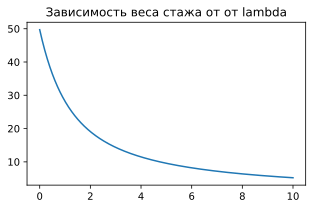

In [28]:
plt.title('Зависимость веса стажа от от lambda')
plt.plot(v_y, v_x1)
plt.show()

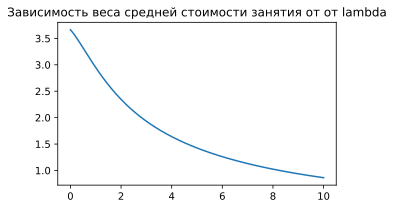

In [29]:
plt.title('Зависимость веса средней стоимости занятия от от lambda')
plt.plot(v_y, v_x2)
plt.show()

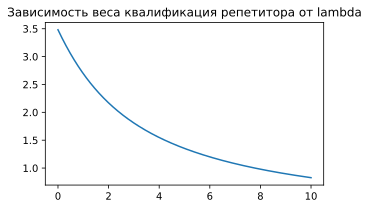

In [30]:
plt.title('Зависимость веса квалификация репетитора от lambda')
plt.plot(v_y, v_x3)
plt.show()

##### 2. Можно ли к одному и тому же признаку применить сразу и нормализацию, и стандартизацию?  


Результат будет такой же как если бы мы применили только стандартизацию.